In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font',family='malgun gothic')
plt.rc('axes',unicode_minus=False)
import seaborn as sns

# EDA
import klib

# Preprocessing&Feature Engineering
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from gensim.models import word2vec

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
import kerastuner as kt

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge, Lars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from vecstack import StackingTransformer
from vecstack import stacking

# Eveluation
from sklearn.metrics import mean_squared_error # squared=False시 RMSE
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import pickle

In [3]:
x_train = pd.read_csv(os.path.abspath("../input")+'/x_train_raw.csv', index_col=0)
x_test = pd.read_csv(os.path.abspath("../input")+'/x_test_raw.csv', index_col=0)
df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949').set_index('custid')
df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
test_id = df_test['custid'].unique()

In [3]:
numeric = ['총구매액', '평균구매액', '최고구매금액', '총환불금액', '총환불횟수', '총할인금액', '평균할인금액', '총실구매액', '평균실구매액',
 '수입상품구매건수', '1월방문', '2월방문', '3월방문', '4월방문', '5월방문', '6월방문', '7월방문', '8월방문', '9월방문', '10월방문',
 '11월방문', '12월방문', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '12_x', '1_y', '2_y', '3_y',
 '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y', '12_y', '1_x.1', '2_x.1', '3_x.1', '4_x.1', '5_x.1', '6_x.1', '7_x.1',
 '8_x.1', '9_x.1', '10_x.1', '11_x.1', '12_x.1', '1_y.1', '2_y.1', '3_y.1', '4_y.1', '5_y.1', '6_y.1', '7_y.1', '8_y.1', '9_y.1',
 '10_y.1', '11_y.1', '12_y.1', '1_x.2', '2_x.2', '3_x.2', '4_x.2', '5_x.2', '6_x.2', '7_x.2', '8_x.2', '9_x.2', '10_x.2', '11_x.2',
 '12_x.2', '1_y.2', '2_y.2', '3_y.2', '4_y.2', '5_y.2', '6_y.2', '7_y.2', '8_y.2', '9_y.2', '10_y.2', '11_y.2', '12_y.2', '1_x.3',
 '2_x.3', '3_x.3', '4_x.3', '5_x.3', '6_x.3', '7_x.3', '8_x.3', '9_x.3', '10_x.3', '11_x.3', '12_x.3', '1월_구매상품다양성', '2월_구매상품다양성',
 '3월_구매상품다양성', '4월_구매상품다양성', '5월_구매상품다양성', '6월_구매상품다양성', '7월_구매상품다양성', '8월_구매상품다양성',
 '9월_구매상품다양성', '10월_구매상품다양성', '11월_구매상품다양성', '12월_구매상품다양성', '1월_구매상품개수', '2월_구매상품개수',
 '3월_구매상품개수', '4월_구매상품개수', '5월_구매상품개수', '6월_구매상품개수', '7월_구매상품개수', '8월_구매상품개수', '9월_구매상품개수',
 '10월_구매상품개수', '11월_구매상품개수', '12월_구매상품개수', '가을_x', '겨울_x', '봄_x', '여름_x', '가을_y', '겨울_y', '봄_y', '여름_y',
 '가을_x.1', '겨울_x.1', '봄_x.1', '여름_x.1', '가을_y.1', '겨울_y.1', '봄_y.1', '여름_y.1', '가을_x.2', '겨울_x.2', '봄_x.2', '여름_x.2',
 '가을_y.2', '겨울_y.2', '봄_y.2', '여름_y.2', '가을_x.3', '겨울_x.3', '봄_x.3', '여름_x.3', '가을_y.3', '겨울_y.3', '봄_y.3', '여름_y.3',
 '가을_구매상품다양성', '겨울_구매상품다양성', '봄_구매상품다양성', '여름_구매상품다양성', '가을_구매상품개수', '겨울_구매상품개수',
 '봄_구매상품개수', '여름_구매상품개수', '전반기_x', '후반기_x', '전반기_y', '후반기_y', '전반기_x.1', '후반기_x.1', '전반기_y.1',
 '후반기_y.1', '전반기_x.2', '후반기_x.2', '전반기_y.2', '후반기_y.2', '전반기_x.3', '후반기_x.3', '전반기_y.3', '후반기_y.3', '전반기_구매상품다양성',
 '후반기_구매상품다양성', '전반기_구매상품개수', '후반기_구매상품개수', '비성수기_x', '성수기_x', '비성수기_y', '성수기_y', '비성수기_x.1',
 '성수기_x.1', '비성수기_y.1', '성수기_y.1', '비성수기_x.2', '성수기_x.2', '비성수기_y.2', '성수기_y.2', '비성수기_x.3', '성수기_x.3',
 '비성수기_y.3', '성수기_y.3', '비성수기_구매상품다양성', '성수기_구매상품다양성', '비성수기_구매상품개수', '성수기_구매상품개수',
 '구매일수', '구매주기', '내점당구매금액', '내점당구매개수', '월말_x', '월중_x', '월초_x', '월말_y', '월중_y', '월초_y', '월말_x.1',
 '월중_x.1', '월초_x.1', '월말_y.1', '월중_y.1', '월초_y.1', '월말_x.2', '월중_x.2', '월초_x.2', '월말_y.2', '월중_y.2', '월초_y.2',
 '월말_x.3', '월중_x.3', '월초_x.3', '월말_y.3', '월중_y.3', '월초_y.3', '월말_구매상품다양성', '월중_구매상품다양성', '월초_구매상품다양성',
 '월말_구매상품개수', '월중_구매상품개수', '월초_구매상품개수', '월_x', '화_x', '수_x', '목_x', '금_x', '토_x', '일_x', '총방문횟수',
 '금_y', '목_y', '수_y', '월_y', '일_y', '토_y', '화_y', '금_x.1', '목_x.1', '수_x.1', '월_x.1', '일_x.1', '토_x.1', '화_x.1', '금_y.1',
 '목_y.1', '수_y.1', '월_y.1', '일_y.1', '토_y.1', '화_y.1', '금_x.2', '목_x.2', '수_x.2', '월_x.2', '일_x.2', '토_x.2', '화_x.2', '금_y.2',
 '목_y.2', '수_y.2', '월_y.2', '일_y.2', '토_y.2', '화_y.2','금_x.3', '목_x.3', '수_x.3', '월_x.3', '일_x.3', '토_x.3', '화_x.3', '금_y.3',
 '목_y.3', '수_y.3', '월_y.3', '일_y.3', '토_y.3', '화_y.3', '금_구매상품다양성', '목_구매상품다양성', '수_구매상품다양성', '월_구매상품다양성',
 '일_구매상품다양성', '토_구매상품다양성', '화_구매상품다양성', '금_구매상품개수', '목_구매상품개수', '수_구매상품개수', '월_구매상품개수',
 '일_구매상품개수', '토_구매상품개수', '화_구매상품개수', '주말_x', '주중_x', '주말_y', '주중_y', '주말_x.1', '주중_x.1', '주말_y.1',
 '주중_y.1', '주말_x.2', '주중_x.2', '주말_y.2', '주중_y.2', '주말_x.3', '주중_x.3', '주말_y.3', '주중_y.3', '주말_구매상품다양성',
 '주중_구매상품다양성', '주말_구매상품개수', '주중_구매상품개수', '9시방문', '10시방문', '11시방문', '12시방문', '13시방문', '14시방문',
 '15시방문', '16시방문', '17시방문', '18시방문', '19시방문', '20시방문', '21시방문', '22시방문', '9_y.3', '10_y.3', '11_y.3', '12_y.3',
 '13_x', '14_x', '15_x', '16_x', '17_x', '18_x', '19_x', '20_x', '21_x', '22_x', '9_x.4', '10_x.4', '11_x.4', '12_x.4', '13_y', '14_y',
 '15_y', '16_y', '17_y', '18_y', '19_y', '20_y', '21_y', '22_y', '9_y.4', '10_y.4', '11_y.4', '12_y.4', '13_x.1', '14_x.1', '15_x.1',
 '16_x.1', '17_x.1', '18_x.1', '19_x.1', '20_x.1', '21_x.1', '9_x.5', '10_x.5', '11_x.5', '12_x.5', '13_y.1', '14_y.1', '15_y.1', '16_y.1',
 '17_y.1', '18_y.1', '19_y.1', '20_y.1', '21_y.1', '22_x.1', '9_y.5', '10_y.5', '11_y.5', '12_y.5', '13_x.2', '14_x.2', '15_x.2',
 '16_x.2', '17_x.2', '18_x.2', '19_x.2', '20_x.2', '21_x.2', '22_y.1', '9_x.6', '10_x.6', '11_x.6', '12_x.6', '13_y.2', '14_y.2',
 '15_y.2', '16_y.2', '17_y.2', '18_y.2', '19_y.2', '20_y.2', '21_y.2', '22_x.2', '9_y.6', '10_y.6', '11_y.6', '12_y.6', '13_x.3',
 '14_x.3', '15_x.3', '16_x.3', '17_x.3', '18_x.3', '19_x.3', '20_x.3', '21_x.3', '22_y.2', '9시_구매상품다양성', '10시_구매상품다양성',
 '11시_구매상품다양성', '12시_구매상품다양성', '13시_구매상품다양성', '14시_구매상품다양성', '15시_구매상품다양성', '16시_구매상품다양성',
 '17시_구매상품다양성', '18시_구매상품다양성', '19시_구매상품다양성', '20시_구매상품다양성', '21시_구매상품다양성', '22시_구매상품다양성',
 '9시_구매상품개수', '10시_구매상품개수', '11시_구매상품개수', '12시_구매상품개수', '13시_구매상품개수', '14시_구매상품개수', '15시_구매상품개수',
 '16시_구매상품개수', '17시_구매상품개수', '18시_구매상품개수', '19시_구매상품개수', '20시_구매상품개수', '21시_구매상품개수', '22시_구매상품개수',
 '오전_x', '오후_x', '오전_y', '오후_y', '오전_x.1', '오후_x.1', '오전_y.1', '오후_y.1', '오전_x.2', '오후_x.2', '오전_y.2', '오후_y.2',
 '오전_x.3', '오후_x.3', '오전_y.3', '오후_y.3', '오전_구매상품다양성', '오후_구매상품다양성', '오전_구매상품개수', '오후_구매상품개수',
 '아침_구매건수_x', '저녁_구매건수_x', '점심_구매건수_x', '아침_구매건수_y', '저녁_구매건수_y', '점심_구매건수_y', '아침_구매건수_x.1',
 '저녁_구매건수_x.1', '점심_구매건수_x.1', '아침_구매건수_y.1', '저녁_구매건수_y.1', '점심_구매건수_y.1', '아침_구매건수_x.2', '저녁_구매건수_x.2',
 '점심_구매건수_x.2', '아침_구매건수_y.2', '저녁_구매건수_y.2', '점심_구매건수_y.2', '아침_구매건수_x.3', '저녁_구매건수_x.3', '점심_구매건수_x.3',
 '아침_구매건수_y.3', '저녁_구매건수_y.3', '점심_구매건수_y.3', '아침_구매건수_구매상품다양성', '저녁_구매건수_구매상품다양성', '점심_구매건수_구매상품다양성',
 '아침_구매건수_구매상품개수', '저녁_구매건수_구매상품개수', '점심_구매건수_구매상품개수', '평균쇼핑시간', '무역점방문', '본점방문',
 '신촌점방문', '천호점방문', '무역점_x', '본점_x', '신촌점_x', '천호점_x', '무역점_y', '본점_y', '신촌점_y', '천호점_y', '무역점_x.1',
 '본점_x.1', '신촌점_x.1', '천호점_x.1', '무역점_y.1', '본점_y.1', '신촌점_y.1', '천호점_y.1', '무역점_x.2', '본점_x.2', '신촌점_x.2',
 '천호점_x.2', '무역점_y.2', '본점_y.2', '신촌점_y.2', '천호점_y.2', '무역점', '본점', '신촌점', '천호점', '무역점_구매상품다양성',
 '본점_구매상품다양성', '신촌점_구매상품다양성', '천호점_구매상품다양성', '무역점_구매상품개수', '본점_구매상품개수', '신촌점_구매상품개수',
 '천호점_구매상품개수', '방문지점수', '방문지점개수', '구매상품다양성', '구매상품수', '평균할부개월수', '무이자할부평균가격', '할부결제건수',
 '1_y.3', '2_y.3', '3_y.3', '4_y.3', '5_y.3', '6_y.3', '7_y.3', '8_y.3', '9_x.7', '10_x.7', '11_x.7', '12_x.7', '1_x.4', '2_x.4', '3_x.4',
 '4_x.4', '5_x.4', '6_x.4', '7_x.4', '8_x.4', '9_y.7', '10_y.7', '11_y.7', '12_y.7', '1_y.4', '2_y.4', '3_y.4', '4_y.4','4_y.4', '5_y.4',
 '6_y.4', '7_y.4', '8_y.4', '9_x.8', '10_x.8', '11_x.8', '12_x.8', '1_x.5', '2_x.5', '3_x.5', '4_x.5', '5_x.5', '6_x.5', '7_x.5',
 '8_x.5', '9_y.8', '10_y.8', '11_y.8', '12_y.8', '1_y.5', '2_y.5', '3_y.5', '4_y.5', '5_y.5', '6_y.5', '7_y.5', '8_y.5', '9_x.9',
 '10_x.9', '11_x.9', '12_x.9', '1_x.6', '2_x.6', '3_x.6', '4_x.6', '5_x.6', '6_x.6', '7_x.6', '8_x.6', '9_y.9', '10_y.9', '11_y.9',
 '12_y.9', '1_y.6', '2_y.6', '3_y.6', '4_y.6', '5_y.6', '6_y.6', '7_y.6', '8_y.6', '9_x.10', '10_x.10', '11_x.10', '12_x.10', '1_x.7',
 '2_x.7', '3_x.7', '4_x.7', '5_x.7', '6_x.7', '7_x.7', '8_x.7', '9_y.10', '10_y.10', '11_y.10', '12_y.10', '1할부개월_구매상품다양성',
 '2할부개월_구매상품다양성', '3할부개월_구매상품다양성', '4할부개월_구매상품다양성', '5할부개월_구매상품다양성', '6할부개월_구매상품다양성',
 '7할부개월_구매상품다양성', '8할부개월_구매상품다양성', '9할부개월_구매상품다양성', '10할부개월_구매상품다양성', '11할부개월_구매상품다양성',
 '12할부개월_구매상품다양성', '1할부개월_구매상품개수', '2할부개월_구매상품개수', '3할부개월_구매상품개수', '4할부개월_구매상품개수',
 '5할부개월_구매상품개수', '6할부개월_구매상품개수', '7할부개월_구매상품개수', '8할부개월_구매상품개수', '9할부개월_구매상품개수',
 '10할부개월_구매상품개수', '11할부개월_구매상품개수', '12할부개월_구매상품개수', '가정용품_구매건수', '가정용품파트_구매건수', '골프/유니캐쥬얼_구매건수',
 '공산품_구매건수', '공산품파트_구매건수', '남성의류_구매건수', '남성정장스포츠_구매건수', '로얄부띠끄_구매건수', '로얄부틱_구매건수', '명품잡화_구매건수',
 '생식품_구매건수', '생식품파트_구매건수', '스포츠캐주얼_구매건수', '스포츠캐쥬얼_구매건수', '아동_구매건수', '아동,스포츠_구매건수',
 '아동문화_구매건수', '여성의류파트_구매건수', '여성정장_구매건수', '여성캐주얼_구매건수', '여성캐쥬얼_구매건수', '영라이브_구매건수',
 '영어덜트캐쥬얼_구매건수', '영캐릭터_구매건수', '영플라자_구매건수', '인터넷백화점_구매건수', '잡화_구매건수', '잡화파트_구매건수',
 '케주얼,구두,아동_구매건수', '패션잡화_구매건수', '가구_구매건수', '가전_구매건수', '기타바이어_구매건수', '니트단품_구매건수', '도자기크리스탈_구매건수',
 '디자이너부띠끄_구매건수', '문화완구_구매건수', '생활용품_구매건수', '섬유_구매건수', '수입명품_구매건수', '스포츠_구매건수', '엘레강스캐주얼_구매건수',
 '영캐주얼_구매건수', '유니캐주얼_구매건수', '유아동복_구매건수', '일반식품_구매건수', '장신구_구매건수', '점외_구매건수', '정장셔츠_구매건수',
 '조리식품_구매건수', '조리욕실_구매건수', '청과곡물_구매건수', '침구수예_구매건수', '캐릭터캐주얼_구매건수', '타운모피_구매건수',
 '트래디셔널캐주얼_구매건수', '피혁A_구매건수', '피혁B_구매건수', '행사장(남성)_구매건수', '행사장(아동스포츠)_구매건수', '행사장(여성정장)_구매건수',
 '행사장(여성캐주얼)_구매건수', '행사장(여성캐쥬)_구매건수', '행사장(잡화)_구매건수', '화장품_구매건수', '최애브랜드구매횟수', '판매일',
 '가정용품_총구매액', '가정용품파트_총구매액', '골프/유니캐쥬얼_총구매액', '공산품_총구매액', '공산품파트_총구매액', '남성의류_총구매액',
 '남성정장스포츠_총구매액', '로얄부띠끄_총구매액', '로얄부틱_총구매액', '명품잡화_총구매액', '생식품_총구매액', '생식품파트_총구매액',
 '스포츠캐주얼_총구매액', '스포츠캐쥬얼_총구매액', '아동_총구매액', '아동,스포츠_총구매액', '아동문화_총구매액', '여성의류파트_총구매액',
 '여성정장_총구매액', '여성캐주얼_총구매액', '여성캐쥬얼_총구매액', '영라이브_총구매액', '영어덜트캐쥬얼_총구매액', '영캐릭터_총구매액',
 '영플라자_총구매액', '인터넷백화점_총구매액', '잡화_총구매액', '잡화파트_총구매액', '케주얼,구두,아동_총구매액', '패션잡화_총구매액',
 '가정용품_평균구매액', '가정용품파트_평균구매액', '골프/유니캐쥬얼_평균구매액', '공산품_평균구매액', '공산품파트_평균구매액', '남성의류_평균구매액',
 '남성정장스포츠_평균구매액', '로얄부띠끄_평균구매액', '로얄부틱_평균구매액', '명품잡화_평균구매액', '생식품_평균구매액', '생식품파트_평균구매액',
 '스포츠캐주얼_평균구매액', '스포츠캐쥬얼_평균구매액', '아동_평균구매액', '아동,스포츠_평균구매액', '아동문화_평균구매액', '여성의류파트_평균구매액',
 '여성정장_평균구매액', '여성캐주얼_평균구매액', '여성캐쥬얼_평균구매액', '영라이브_평균구매액', '영어덜트캐쥬얼_평균구매액', '영캐릭터_평균구매액',
 '영플라자_평균구매액', '인터넷백화점_평균구매액', '잡화_평균구매액', '잡화파트_평균구매액', '케주얼,구두,아동_평균구매액', '패션잡화_평균구매액',
 '가정용품_할인금액', '가정용품파트_할인금액', '골프/유니캐쥬얼_할인금액', '공산품_할인금액', '공산품파트_할인금액', '남성의류_할인금액',
 '남성정장스포츠_할인금액', '로얄부띠끄_할인금액', '로얄부틱_할인금액', '명품잡화_할인금액', '생식품_할인금액', '생식품파트_할인금액',
 '스포츠캐주얼_할인금액', '스포츠캐쥬얼_할인금액', '아동_할인금액', '아동,스포츠_할인금액', '아동문화_할인금액', '여성의류파트_할인금액',
 '여성정장_할인금액', '여성캐주얼_할인금액', '여성캐쥬얼_할인금액', '영라이브_할인금액', '영어덜트캐쥬얼_할인금액', '영캐릭터_할인금액',
 '영플라자_할인금액', '인터넷백화점_할인금액', '잡화_할인금액', '잡화파트_할인금액', '케주얼,구두,아동_할인금액', '패션잡화_할인금액',
 '가정용품_구매상품다양성', '가정용품파트_구매상품다양성', '골프/유니캐쥬얼_구매상품다양성', '공산품_구매상품다양성', '공산품파트_구매상품다양성',
 '남성의류_구매상품다양성', '남성정장스포츠_구매상품다양성', '로얄부띠끄_구매상품다양성', '로얄부틱_구매상품다양성', '명품잡화_구매상품다양성',
 '생식품_구매상품다양성', '생식품파트_구매상품다양성', '스포츠캐주얼_구매상품다양성', '스포츠캐쥬얼_구매상품다양성', '아동_구매상품다양성',
 '아동,스포츠_구매상품다양성', '아동문화_구매상품다양성', '여성의류파트_구매상품다양성', '여성정장_구매상품다양성', '여성캐주얼_구매상품다양성',
 '여성캐쥬얼_구매상품다양성', '영라이브_구매상품다양성', '영어덜트캐쥬얼_구매상품다양성', '영캐릭터_구매상품다양성', '영플라자_구매상품다양성',
 '인터넷백화점_구매상품다양성', '잡화_구매상품다양성', '잡화파트_구매상품다양성', '케주얼,구두,아동_구매상품다양성', '패션잡화_구매상품다양성',
 '가정용품_구매상품개수', '가정용품파트_구매상품개수', '골프/유니캐쥬얼_구매상품개수', '공산품_구매상품개수', '공산품파트_구매상품개수',
 '남성의류_구매상품개수', '남성정장스포츠_구매상품개수', '로얄부띠끄_구매상품개수', '로얄부틱_구매상품개수', '명품잡화_구매상품개수',
 '생식품_구매상품개수', '생식품파트_구매상품개수', '스포츠캐주얼_구매상품개수', '스포츠캐쥬얼_구매상품개수', '아동_구매상품개수',
 '아동,스포츠_구매상품개수', '아동문화_구매상품개수', '여성의류파트_구매상품개수', '여성정장_구매상품개수', '여성캐주얼_구매상품개수',
 '여성캐쥬얼_구매상품개수', '영라이브_구매상품개수', '영어덜트캐쥬얼_구매상품개수', '영캐릭터_구매상품개수', '영플라자_구매상품개수',
 '인터넷백화점_구매상품개수', '잡화_구매상품개수', '잡화파트_구매상품개수', '케주얼,구두,아동_구매상품개수', '패션잡화_구매상품개수']
prop = ['수입상품구매비율', '1월방문_prop', '2월방문_prop', '3월방문_prop', '4월방문_prop', '5월방문_prop', '6월방문_prop', '7월방문_prop',
 '8월방문_prop', '9월방문_prop', '10월방문_prop', '11월방문_prop', '12월방문_prop', '성수기방문비율', '비성수기방문비율', '전반기방문비율',
 '후반기방문비율', '가을_prop', '겨울_prop', '봄_prop', '여름_prop', '월_prop', '화_prop', '수_prop', '목_prop', '금_prop', '토_prop',
 '일_prop', '주말방문비율', '9시방문_prop', '10시방문_prop', '11시방문_prop', '12시방문_prop', '13시방문_prop', '14시방문_prop', '15시방문_prop',
 '16시방문_prop', '17시방문_prop', '18시방문_prop', '19시방문_prop', '20시방문_prop', '21시방문_prop', '22시방문_prop', '아침_구매건수_prop',
 '저녁_구매건수_prop', '점심_구매건수_prop', '오전방문비율', '오후방문비율', '무역점방문_prop', '본점방문_prop', '신촌점방문_prop',
 '천호점방문_prop', '할부결제비율', '할인율_x', '할인율_y',]

In [4]:
x_train_num = x_train[numeric+prop]
x_train_cat = x_train.drop(columns=numeric, axis=1)
x_test_num = x_test[numeric+prop]
x_test_cat = x_test.drop(columns=numeric, axis=1)

In [5]:
print(x_train_num.shape, x_test_num.shape,'\n',x_train_cat.shape,x_test_cat.shape)

(21587, 965) (14380, 965) 
 (21587, 1055) (14380, 1055)


## Categorical Features

### Feature Selection

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [03:27<00:00,  2.18s/it]

(72, -71.174212754492)


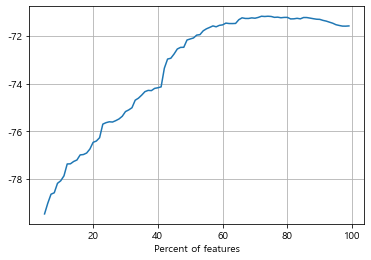

In [6]:
features_cat = x_train_cat
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = Ridge(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
# feature 개수 바꿔가며 성능 test한다.
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(x_train_cat, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [7]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(x_train_cat, y_train)
x_train_cat = fs.transform(x_train_cat)
x_test_cat = fs.transform(x_test_cat)

print(x_train_cat.shape)
print(features_cat.columns[fs.get_support()].tolist())

(21587, 759)
['가방', '가스렌지', '가정잡화', '건강식품', '건식품', '건어물', '곡물', '골프(LC)', '골프(NB)', '골프(국내)', '골프(수입)', '골프단품', '골프웨어', '과자', '과자류', '교복행사', '국내부띠끄', '내셔날', '내셔널', '냉난방', '냉동식품', '냉장식품', '니트', '니트웨어', '단품', '단품행사', '드레스구두', '디자이너니트', '디자이너부띠끄', '디자이너숍', '라이센스', '란제리', '레이디숍A', '레포츠', '레포츠단품', '로얄부틱2F', '로얄수입행사', '면류', '모자', '문화', '부띠끄', '부띠끄행사', '브랜드침구', '색조화장품', '생선', '셔츠', '수영복', '수예', '수예행사', '수입구두', '수입도자기', '수입부띠끄', '슈즈', '스타킹', '스포츠단품', '스포츠슈즈', '스포츠용퓸', '스포츠웨어', '스포츠캐주얼', '신생아', '싸롱화', '아동', '아동단품', '아동복', '아동잡화', '아동특선', '아웃도어', '야채', '양말', '어덜트', '엘레강스', '엘레강스부틱', '영캐주얼', '영캐쥬얼', '완구', '완구(문화)', '욕실용품', '용기보증', '유아', '유아복', '유아용품', '음료', '의류기타', '일반조리', '일용잡화', '임대골프', '잡화', '잡화(문화)', '전문가구(가구)', '정육', '조미료', '주방용품', '즉석조리', '진캐주얼', '진캐쥬얼', '청과', '초도자기', '취사소형', '침구', '크리스탈', '타운', '타운단품', '타운웨어', '통병조림', '트래디셔널', '트래디셔널캐쥬얼', '특선행사', '팬시코너(문화)', '하이캐쥬얼', '핸드백', '행사', '홈쇼핑', '화장품', '훼미닌부틱', 'brd_nm_0', 'brd_nm_2', 'brd_nm_7', 'brd_nm_9', 'brd_nm_10', 'brd_nm_11', 'brd_nm_12', '

In [9]:
pd.DataFrame(x_train_cat,columns=features_cat.columns[fs.get_support()].tolist()).to_csv('x_train_cat.csv')
pd.DataFrame(x_test_cat,columns=features_cat.columns[fs.get_support()].tolist()).to_csv('x_test_cat.csv')

### Model Tuning

In [7]:
x_train_cat = np.array(x_train_cat)
x_test_cat = np.array(x_test_cat)

In [8]:
x_train_cat2, x_dev_cat, y_train2, y_dev = train_test_split(x_train_cat, y_train, test_size=0.3, random_state=0)

In [19]:
pbounds = {
    'alpha':(0,50)
}
def rid_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    rid.fit(x_train_cat2,y_train2)
    score = mean_squared_error(rid.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_rid = BayesianOptimization(rid_opt, pbounds, random_state=0)
BO_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.496    |  27.44    |
|  2        | -8.503    |  35.76    |
|  3        | -8.498    |  30.14    |
|  4        | -8.495    |  27.24    |
|  5        | -8.489    |  21.18    |
|  6        | -8.5      |  32.29    |
|  7        | -8.49     |  21.88    |
|  8        | -8.51     |  44.59    |
|  9        | -8.513    |  48.18    |
|  10       | -8.486    |  19.17    |
|  11       | -8.506    |  39.59    |
|  12       | -8.495    |  26.44    |
|  13       | -8.497    |  28.4     |
|  14       | -8.511    |  46.28    |
|  15       | -8.458    |  3.552    |
|  16       | -8.46     |  4.356    |
|  17       | -8.46     |  1.011    |
|  18       | -8.508    |  41.63    |
|  19       | -8.506    |  38.91    |
|  20       | -8.509    |  43.5     |
|  21       | -8.513    |  48.93    |
|  22       | -8.507    |  39.96    |
|  23       | -8.491    |  23.07    |
|  24       | -8.506    |  39.03    |
|  25       

In [20]:
BO_rid.max

{'target': -8.455956144994206, 'params': {'alpha': 2.141450519257165}}

In [21]:
pbounds = {
    'alpha':(0,50)
}
def las_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    las.fit(x_train_cat2,y_train2)
    score = mean_squared_error(las.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_las = BayesianOptimization(las_opt, pbounds, random_state=0)
BO_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.43    |  27.44    |
|  2        | -10.43    |  35.76    |
|  3        | -10.43    |  30.14    |
|  4        | -10.43    |  27.24    |
|  5        | -10.43    |  21.18    |
|  6        | -10.43    |  32.29    |
|  7        | -10.43    |  21.88    |
|  8        | -10.43    |  44.59    |
|  9        | -10.43    |  48.18    |
|  10       | -10.43    |  19.17    |
|  11       | -10.43    |  39.59    |
|  12       | -10.43    |  26.44    |
|  13       | -10.43    |  28.4     |
|  14       | -10.43    |  46.28    |
|  15       | -10.43    |  3.552    |
|  16       | -10.43    |  4.356    |
|  17       | -9.92     |  1.011    |
|  18       | -10.43    |  41.63    |
|  19       | -10.43    |  38.91    |
|  20       | -10.43    |  43.5     |
|  21       | -10.43    |  48.93    |
|  22       | -10.43    |  39.96    |
|  23       | -10.43    |  23.07    |
|  24       | -10.43    |  39.03    |
|  25       

In [22]:
BO_las.max

{'target': -8.503678969780816, 'params': {'alpha': 0.0031679860402866744}}

In [23]:
pbounds = {
    'alpha':(0,50)
}
def ela_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    ela.fit(x_train_cat2,y_train2)
    score = mean_squared_error(ela.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_ela = BayesianOptimization(ela_opt, pbounds, random_state=0)
BO_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.43    |  27.44    |
|  2        | -10.43    |  35.76    |
|  3        | -10.43    |  30.14    |
|  4        | -10.43    |  27.24    |
|  5        | -10.43    |  21.18    |
|  6        | -10.43    |  32.29    |
|  7        | -10.43    |  21.88    |
|  8        | -10.43    |  44.59    |
|  9        | -10.43    |  48.18    |
|  10       | -10.43    |  19.17    |
|  11       | -10.43    |  39.59    |
|  12       | -10.43    |  26.44    |
|  13       | -10.43    |  28.4     |
|  14       | -10.43    |  46.28    |
|  15       | -10.4     |  3.552    |
|  16       | -10.43    |  4.356    |
|  17       | -9.616    |  1.011    |
|  18       | -10.43    |  41.63    |
|  19       | -10.43    |  38.91    |
|  20       | -10.43    |  43.5     |
|  21       | -10.43    |  48.93    |
|  22       | -10.43    |  39.96    |
|  23       | -10.43    |  23.07    |
|  24       | -10.43    |  39.03    |
|  25       

In [24]:
BO_ela.max

{'target': -8.51385311527744, 'params': {'alpha': 0.0031679860402866744}}

In [25]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    ard.fit(x_train_cat2,y_train2)
    score = mean_squared_error(ard.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_ard = BayesianOptimization(ard_opt, pbounds, random_state=0)
BO_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.517    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.521    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.5      |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.526    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.498    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.548    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.506    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.502    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.645    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.494    |  33.53    |  10.52    |  1.2

|  58       | -9.084    |  8.893    |  49.14    |  10.0     |  0.0      |  193.6    |
|  59       | -8.507    |  0.2782   |  35.8     |  4.753    |  5.738    |  667.4    |
|  60       | -8.492    |  30.3     |  45.02    |  1.963    |  5.088    |  918.7    |
|  61       | -8.558    |  20.4     |  31.17    |  7.575    |  3.315    |  931.2    |
|  62       | -8.508    |  48.55    |  40.34    |  5.375    |  6.504    |  207.1    |
|  63       | -8.476    |  11.98    |  31.01    |  0.0      |  10.0     |  191.2    |
|  64       | -8.476    |  36.43    |  39.91    |  0.0      |  10.0     |  755.2    |
|  65       | -8.476    |  24.78    |  31.83    |  0.0      |  10.0     |  185.4    |
|  66       | -8.476    |  17.4     |  36.23    |  0.0      |  10.0     |  175.5    |
|  67       | -8.478    |  1.341    |  22.37    |  0.1156   |  1.519    |  189.3    |
|  68       | -8.476    |  0.5898   |  28.31    |  0.0      |  10.0     |  201.7    |
|  69       | -8.634    |  39.76    |  39.75    |  9.2

In [26]:
BO_ard.max

{'target': -8.471852782770691,
 'params': {'alpha_1': 34.76870111024178,
  'alpha_2': 40.063650975282826,
  'lambda_1': 0.6487969603784871,
  'lambda_2': 9.930508557701192,
  'n_iter': 773.9687838303074}}

In [27]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    bay.fit(x_train_cat2,y_train2)
    score = mean_squared_error(bay.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_bay = BayesianOptimization(bay_opt, pbounds, random_state=0)
BO_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.49     |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.491    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.489    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.492    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.489    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.493    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.489    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.49     |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.492    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.487    |  33.53    |  10.52    |  1.2

|  58       | -8.488    |  21.62    |  31.22    |  1.119    |  2.082    |  613.3    |
|  59       | -8.488    |  14.49    |  39.03    |  1.502    |  2.707    |  193.3    |
|  60       | -8.487    |  20.94    |  20.78    |  1.53     |  9.375    |  932.6    |
|  61       | -8.487    |  13.22    |  16.57    |  2.192    |  7.403    |  930.8    |
|  62       | -8.487    |  12.83    |  28.07    |  1.339    |  8.919    |  600.3    |
|  63       | -8.486    |  39.01    |  42.83    |  0.497    |  8.672    |  750.9    |
|  64       | -8.487    |  46.94    |  48.2     |  3.078    |  8.473    |  759.8    |
|  65       | -8.485    |  49.04    |  40.04    |  0.0      |  10.0     |  746.8    |
|  66       | -8.486    |  43.06    |  32.92    |  1.067    |  7.494    |  742.0    |
|  67       | -8.489    |  45.28    |  43.47    |  3.517    |  3.967    |  739.2    |
|  68       | -8.486    |  26.55    |  35.05    |  0.1508   |  9.749    |  752.5    |
|  69       | -8.49     |  21.38    |  24.48    |  4.8

In [28]:
BO_bay.max

{'target': -8.485140426146819,
 'params': {'alpha_1': 49.03743486079745,
  'alpha_2': 40.03692702558726,
  'lambda_1': 0.0,
  'lambda_2': 10.0,
  'n_iter': 746.8411909812759}}

In [29]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    lgbm.fit(x_train_cat2,y_train2)
    score = mean_squared_error(lgbm.predict(x_dev_cat),y_dev,squared=False)
    return -score
BO_lgbm = BayesianOptimization(lgbm_opt, pbounds, random_state=0)
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -9.885    |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -9.391    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -10.41    |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.332    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -9.908    |  0.8334   |  0.6706   |  1

|  31       | -10.34    |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -9.276    |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.545    |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -10.72    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.622    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -10.33    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -9.009    |  0.6777   |  0.3567   |  1

|  63       | -9.979    |  0.9796   |  0.7223   |  51.32    |  3.758    |  101.6    |  24.2     |  847.7    |  61.99    |  40.38    |  9.155    |  0.6278   |
|  64       | -10.06    |  0.7356   |  0.7135   |  488.5    |  9.391    |  58.16    |  3.945    |  808.2    |  13.75    |  29.08    |  0.3623   |  0.826    |
|  65       | -8.945    |  0.6494   |  0.3711   |  95.2     |  27.03    |  59.61    |  27.15    |  750.1    |  56.99    |  48.03    |  2.136    |  0.9709   |
|  66       | -10.41    |  0.6605   |  0.8269   |  21.69    |  6.07     |  103.9    |  48.36    |  448.1    |  25.99    |  15.68    |  2.526    |  0.9264   |
|  67       | -8.891    |  0.7637   |  0.001914 |  312.3    |  19.34    |  121.8    |  43.99    |  714.1    |  22.72    |  17.79    |  7.101    |  0.7602   |
|  68       | -8.661    |  0.6773   |  0.2712   |  38.97    |  10.57    |  131.4    |  7.819    |  288.2    |  13.94    |  29.63    |  9.091    |  0.5968   |
|  69       | -9.899    |  0.6716   |  0.6738   |  2

|  95       | -10.46    |  0.5915   |  0.8848   |  422.4    |  4.901    |  192.0    |  29.31    |  997.7    |  37.74    |  34.89    |  4.982    |  0.7188   |
|  96       | -8.964    |  0.5663   |  0.3277   |  285.1    |  26.67    |  118.4    |  29.2     |  683.6    |  39.87    |  42.44    |  6.335    |  0.6376   |
|  97       | -10.43    |  0.6791   |  0.7894   |  297.4    |  14.82    |  37.22    |  12.59    |  895.9    |  38.48    |  16.15    |  5.271    |  0.9826   |
|  98       | -9.319    |  0.6166   |  0.4523   |  24.02    |  5.59     |  93.81    |  8.643    |  325.7    |  27.52    |  18.51    |  0.3086   |  0.5183   |
|  99       | -9.857    |  0.6984   |  0.6325   |  419.0    |  9.997    |  187.6    |  27.5     |  982.0    |  48.23    |  25.89    |  2.976    |  0.7618   |
|  100      | -8.524    |  0.5111   |  0.09371  |  312.9    |  14.69    |  45.71    |  17.27    |  889.0    |  39.94    |  18.38    |  8.042    |  0.7371   |


In [30]:
BO_lgbm.max

{'target': -8.331783615441374,
 'params': {'colsample_bytree': 0.7842169744343243,
  'learning_rate': 0.018789800436355142,
  'max_bin': 312.64139356717976,
  'max_depth': 20.362871681672644,
  'min_child_samples': 127.21745940620382,
  'min_child_weight': 47.24365584721659,
  'n_estimators': 713.6382691931351,
  'num_leaves': 24.289489835574734,
  'reg_alpha': 21.857227370429083,
  'reg_lambda': 6.976614328076722,
  'subsample': 0.5301127358146349}}

In [31]:
max_params_rid = BO_rid.max['params']
max_params_las = BO_las.max['params']
max_params_ela = BO_ela.max['params']
max_params_ard = BO_ard.max['params']
max_params_bay = BO_bay.max['params']
max_params_lgbm = BO_lgbm.max['params']

In [32]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [33]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm,'\n')

{'alpha': 2.141450519257165} 
 {'alpha': 0.0031679860402866744} 
 {'alpha': 0.0031679860402866744} 
 {'alpha_1': 34.76870111024178, 'alpha_2': 40.063650975282826, 'lambda_1': 0.6487969603784871, 'lambda_2': 9.930508557701192, 'n_iter': 774} 
 {'alpha_1': 49.03743486079745, 'alpha_2': 40.03692702558726, 'lambda_1': 0.0, 'lambda_2': 10.0, 'n_iter': 747} 
 {'colsample_bytree': 0.7842169744343243, 'learning_rate': 0.018789800436355142, 'max_bin': 313, 'max_depth': 20, 'min_child_samples': 127, 'min_child_weight': 47, 'n_estimators': 714, 'num_leaves': 24, 'reg_alpha': 21.857227370429083, 'reg_lambda': 6.976614328076722, 'subsample': 0.5301127358146349} 



In [9]:
max_params_rid = {'alpha': 2.141450519257165} 
max_params_las = {'alpha': 0.0031679860402866744} 
max_params_ela = {'alpha': 0.0031679860402866744} 
max_params_ard = {'alpha_1': 34.76870111024178, 'alpha_2': 40.063650975282826, 'lambda_1': 0.6487969603784871, 'lambda_2': 9.930508557701192, 'n_iter': 774} 
max_params_bay = {'alpha_1': 49.03743486079745, 'alpha_2': 40.03692702558726, 'lambda_1': 0.0, 'lambda_2': 10.0, 'n_iter': 747} 
max_params_lgbm = {'colsample_bytree': 0.7842169744343243, 'learning_rate': 0.018789800436355142, 'max_bin': 313, 'max_depth': 20, 'min_child_samples': 127, 'min_child_weight': 47, 'n_estimators': 714, 'num_leaves': 24, 'reg_alpha': 21.857227370429083, 'reg_lambda': 6.976614328076722, 'subsample': 0.5301127358146349}

In [10]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained = [(name, reg.fit(x_train_cat2,y_train2), float(mean_squared_error(reg.predict(x_dev_cat),y_dev,squared=False))) 
                    for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [03:47<00:51, 51.43s/it]

Learning rate set to 0.063286
0:	learn: 10.2971068	total: 251ms	remaining: 4m 10s
1:	learn: 10.1671219	total: 351ms	remaining: 2m 55s
2:	learn: 10.0525024	total: 455ms	remaining: 2m 31s
3:	learn: 9.9380100	total: 562ms	remaining: 2m 19s
4:	learn: 9.8299066	total: 664ms	remaining: 2m 12s
5:	learn: 9.7327829	total: 761ms	remaining: 2m 6s
6:	learn: 9.6430502	total: 870ms	remaining: 2m 3s
7:	learn: 9.5602381	total: 967ms	remaining: 1m 59s
8:	learn: 9.4884367	total: 1.06s	remaining: 1m 56s
9:	learn: 9.4173503	total: 1.16s	remaining: 1m 55s
10:	learn: 9.3573294	total: 1.28s	remaining: 1m 55s
11:	learn: 9.2948038	total: 1.41s	remaining: 1m 55s
12:	learn: 9.2388768	total: 1.52s	remaining: 1m 55s
13:	learn: 9.1796369	total: 1.65s	remaining: 1m 55s
14:	learn: 9.1356946	total: 1.76s	remaining: 1m 55s
15:	learn: 9.0833284	total: 1.89s	remaining: 1m 56s
16:	learn: 9.0373517	total: 2.01s	remaining: 1m 56s
17:	learn: 8.9955894	total: 2.11s	remaining: 1m 55s
18:	learn: 8.9582901	total: 2.23s	remaining

158:	learn: 7.8480051	total: 18.2s	remaining: 1m 36s
159:	learn: 7.8449015	total: 18.3s	remaining: 1m 35s
160:	learn: 7.8411287	total: 18.4s	remaining: 1m 35s
161:	learn: 7.8354190	total: 18.5s	remaining: 1m 35s
162:	learn: 7.8317590	total: 18.6s	remaining: 1m 35s
163:	learn: 7.8277663	total: 18.7s	remaining: 1m 35s
164:	learn: 7.8217912	total: 18.8s	remaining: 1m 35s
165:	learn: 7.8177578	total: 18.9s	remaining: 1m 34s
166:	learn: 7.8132808	total: 19s	remaining: 1m 34s
167:	learn: 7.8099697	total: 19.1s	remaining: 1m 34s
168:	learn: 7.8050216	total: 19.3s	remaining: 1m 34s
169:	learn: 7.8012622	total: 19.4s	remaining: 1m 34s
170:	learn: 7.7965426	total: 19.5s	remaining: 1m 34s
171:	learn: 7.7926116	total: 19.6s	remaining: 1m 34s
172:	learn: 7.7882610	total: 19.8s	remaining: 1m 34s
173:	learn: 7.7844312	total: 19.9s	remaining: 1m 34s
174:	learn: 7.7792531	total: 20s	remaining: 1m 34s
175:	learn: 7.7749543	total: 20.1s	remaining: 1m 33s
176:	learn: 7.7695272	total: 20.2s	remaining: 1m 3

315:	learn: 7.1847004	total: 36.5s	remaining: 1m 19s
316:	learn: 7.1796000	total: 36.6s	remaining: 1m 18s
317:	learn: 7.1766709	total: 36.7s	remaining: 1m 18s
318:	learn: 7.1737416	total: 36.8s	remaining: 1m 18s
319:	learn: 7.1713759	total: 36.9s	remaining: 1m 18s
320:	learn: 7.1682009	total: 37.1s	remaining: 1m 18s
321:	learn: 7.1630413	total: 37.2s	remaining: 1m 18s
322:	learn: 7.1598435	total: 37.3s	remaining: 1m 18s
323:	learn: 7.1561452	total: 37.4s	remaining: 1m 18s
324:	learn: 7.1525402	total: 37.5s	remaining: 1m 17s
325:	learn: 7.1503701	total: 37.6s	remaining: 1m 17s
326:	learn: 7.1474900	total: 37.7s	remaining: 1m 17s
327:	learn: 7.1432293	total: 37.9s	remaining: 1m 17s
328:	learn: 7.1396865	total: 38s	remaining: 1m 17s
329:	learn: 7.1357140	total: 38.1s	remaining: 1m 17s
330:	learn: 7.1308788	total: 38.2s	remaining: 1m 17s
331:	learn: 7.1257106	total: 38.3s	remaining: 1m 17s
332:	learn: 7.1220390	total: 38.4s	remaining: 1m 16s
333:	learn: 7.1188818	total: 38.5s	remaining: 1m

473:	learn: 6.6363724	total: 55.5s	remaining: 1m 1s
474:	learn: 6.6340480	total: 55.7s	remaining: 1m 1s
475:	learn: 6.6309665	total: 55.9s	remaining: 1m 1s
476:	learn: 6.6278084	total: 56.1s	remaining: 1m 1s
477:	learn: 6.6249757	total: 56.2s	remaining: 1m 1s
478:	learn: 6.6229110	total: 56.3s	remaining: 1m 1s
479:	learn: 6.6210009	total: 56.4s	remaining: 1m 1s
480:	learn: 6.6175236	total: 56.5s	remaining: 1m
481:	learn: 6.6133561	total: 56.6s	remaining: 1m
482:	learn: 6.6110223	total: 56.7s	remaining: 1m
483:	learn: 6.6068739	total: 56.9s	remaining: 1m
484:	learn: 6.6040027	total: 57s	remaining: 1m
485:	learn: 6.6006370	total: 57.1s	remaining: 1m
486:	learn: 6.5975912	total: 57.2s	remaining: 1m
487:	learn: 6.5951048	total: 57.3s	remaining: 1m
488:	learn: 6.5915583	total: 57.4s	remaining: 1m
489:	learn: 6.5883000	total: 57.6s	remaining: 59.9s
490:	learn: 6.5837597	total: 57.7s	remaining: 59.8s
491:	learn: 6.5802124	total: 57.8s	remaining: 59.7s
492:	learn: 6.5771732	total: 58s	remainin

633:	learn: 6.1424435	total: 1m 14s	remaining: 43s
634:	learn: 6.1392978	total: 1m 14s	remaining: 42.9s
635:	learn: 6.1356254	total: 1m 14s	remaining: 42.7s
636:	learn: 6.1326867	total: 1m 14s	remaining: 42.6s
637:	learn: 6.1293993	total: 1m 14s	remaining: 42.5s
638:	learn: 6.1265869	total: 1m 14s	remaining: 42.4s
639:	learn: 6.1234037	total: 1m 15s	remaining: 42.2s
640:	learn: 6.1205527	total: 1m 15s	remaining: 42.1s
641:	learn: 6.1183200	total: 1m 15s	remaining: 42s
642:	learn: 6.1159694	total: 1m 15s	remaining: 41.9s
643:	learn: 6.1136942	total: 1m 15s	remaining: 41.8s
644:	learn: 6.1102932	total: 1m 15s	remaining: 41.7s
645:	learn: 6.1076136	total: 1m 15s	remaining: 41.6s
646:	learn: 6.1052236	total: 1m 15s	remaining: 41.5s
647:	learn: 6.1027460	total: 1m 16s	remaining: 41.3s
648:	learn: 6.0997606	total: 1m 16s	remaining: 41.2s
649:	learn: 6.0960056	total: 1m 16s	remaining: 41.1s
650:	learn: 6.0923447	total: 1m 16s	remaining: 41s
651:	learn: 6.0888398	total: 1m 16s	remaining: 40.8s

790:	learn: 5.7133880	total: 1m 37s	remaining: 25.7s
791:	learn: 5.7099419	total: 1m 37s	remaining: 25.6s
792:	learn: 5.7075234	total: 1m 37s	remaining: 25.4s
793:	learn: 5.7044172	total: 1m 37s	remaining: 25.3s
794:	learn: 5.7007992	total: 1m 37s	remaining: 25.2s
795:	learn: 5.6983999	total: 1m 38s	remaining: 25.1s
796:	learn: 5.6954698	total: 1m 38s	remaining: 25s
797:	learn: 5.6934946	total: 1m 38s	remaining: 24.9s
798:	learn: 5.6906157	total: 1m 38s	remaining: 24.8s
799:	learn: 5.6876788	total: 1m 38s	remaining: 24.7s
800:	learn: 5.6845944	total: 1m 38s	remaining: 24.6s
801:	learn: 5.6825430	total: 1m 39s	remaining: 24.5s
802:	learn: 5.6809434	total: 1m 39s	remaining: 24.4s
803:	learn: 5.6784395	total: 1m 39s	remaining: 24.2s
804:	learn: 5.6755289	total: 1m 39s	remaining: 24.1s
805:	learn: 5.6730043	total: 1m 39s	remaining: 24s
806:	learn: 5.6705076	total: 1m 39s	remaining: 23.9s
807:	learn: 5.6668803	total: 1m 40s	remaining: 23.8s
808:	learn: 5.6644803	total: 1m 40s	remaining: 23.

947:	learn: 5.3200801	total: 1m 55s	remaining: 6.34s
948:	learn: 5.3171410	total: 1m 55s	remaining: 6.22s
949:	learn: 5.3147215	total: 1m 55s	remaining: 6.09s
950:	learn: 5.3128126	total: 1m 55s	remaining: 5.97s
951:	learn: 5.3107468	total: 1m 56s	remaining: 5.85s
952:	learn: 5.3077073	total: 1m 56s	remaining: 5.73s
953:	learn: 5.3053792	total: 1m 56s	remaining: 5.61s
954:	learn: 5.3042809	total: 1m 56s	remaining: 5.48s
955:	learn: 5.3015908	total: 1m 56s	remaining: 5.36s
956:	learn: 5.3000233	total: 1m 56s	remaining: 5.24s
957:	learn: 5.2976079	total: 1m 56s	remaining: 5.12s
958:	learn: 5.2951493	total: 1m 56s	remaining: 5s
959:	learn: 5.2935006	total: 1m 56s	remaining: 4.87s
960:	learn: 5.2915142	total: 1m 57s	remaining: 4.75s
961:	learn: 5.2894061	total: 1m 57s	remaining: 4.63s
962:	learn: 5.2866695	total: 1m 57s	remaining: 4.5s
963:	learn: 5.2852061	total: 1m 57s	remaining: 4.38s
964:	learn: 5.2822177	total: 1m 57s	remaining: 4.26s
965:	learn: 5.2797968	total: 1m 57s	remaining: 4.1

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:55<00:00, 50.73s/it]


In [11]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained_for_submissions = [(name, reg.fit(x_train_cat,y_train)) for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:23, 23.18s/it]

Learning rate set to 0.067435
0:	learn: 10.2782186	total: 123ms	remaining: 2m 3s
1:	learn: 10.1474636	total: 256ms	remaining: 2m 7s
2:	learn: 10.0160539	total: 369ms	remaining: 2m 2s
3:	learn: 9.9030607	total: 492ms	remaining: 2m 2s
4:	learn: 9.8028527	total: 612ms	remaining: 2m 1s
5:	learn: 9.7019244	total: 721ms	remaining: 1m 59s
6:	learn: 9.6144492	total: 845ms	remaining: 1m 59s
7:	learn: 9.5304284	total: 953ms	remaining: 1m 58s
8:	learn: 9.4580606	total: 1.06s	remaining: 1m 56s
9:	learn: 9.3806804	total: 1.18s	remaining: 1m 56s
10:	learn: 9.3174223	total: 1.29s	remaining: 1m 55s
11:	learn: 9.2577183	total: 1.39s	remaining: 1m 54s
12:	learn: 9.2030834	total: 1.51s	remaining: 1m 54s
13:	learn: 9.1523457	total: 1.61s	remaining: 1m 53s
14:	learn: 9.1075455	total: 1.75s	remaining: 1m 54s
15:	learn: 9.0644418	total: 1.86s	remaining: 1m 54s
16:	learn: 9.0212482	total: 1.97s	remaining: 1m 53s
17:	learn: 8.9817158	total: 2.1s	remaining: 1m 54s
18:	learn: 8.9461825	total: 2.23s	remaining: 1m

159:	learn: 7.9634908	total: 17.9s	remaining: 1m 33s
160:	learn: 7.9603200	total: 18s	remaining: 1m 33s
161:	learn: 7.9569475	total: 18.1s	remaining: 1m 33s
162:	learn: 7.9535296	total: 18.2s	remaining: 1m 33s
163:	learn: 7.9494460	total: 18.2s	remaining: 1m 33s
164:	learn: 7.9452859	total: 18.3s	remaining: 1m 32s
165:	learn: 7.9408957	total: 18.4s	remaining: 1m 32s
166:	learn: 7.9364856	total: 18.5s	remaining: 1m 32s
167:	learn: 7.9329421	total: 18.6s	remaining: 1m 32s
168:	learn: 7.9289276	total: 18.7s	remaining: 1m 32s
169:	learn: 7.9252590	total: 18.8s	remaining: 1m 31s
170:	learn: 7.9202971	total: 18.9s	remaining: 1m 31s
171:	learn: 7.9152175	total: 19s	remaining: 1m 31s
172:	learn: 7.9106463	total: 19.1s	remaining: 1m 31s
173:	learn: 7.9071162	total: 19.2s	remaining: 1m 30s
174:	learn: 7.9029304	total: 19.3s	remaining: 1m 30s
175:	learn: 7.8980432	total: 19.4s	remaining: 1m 30s
176:	learn: 7.8941214	total: 19.4s	remaining: 1m 30s
177:	learn: 7.8897882	total: 19.5s	remaining: 1m 3

316:	learn: 7.4013743	total: 32.1s	remaining: 1m 9s
317:	learn: 7.3989026	total: 32.2s	remaining: 1m 9s
318:	learn: 7.3953113	total: 32.3s	remaining: 1m 8s
319:	learn: 7.3919118	total: 32.4s	remaining: 1m 8s
320:	learn: 7.3884196	total: 32.5s	remaining: 1m 8s
321:	learn: 7.3855376	total: 32.6s	remaining: 1m 8s
322:	learn: 7.3830389	total: 32.7s	remaining: 1m 8s
323:	learn: 7.3803099	total: 32.8s	remaining: 1m 8s
324:	learn: 7.3769632	total: 32.8s	remaining: 1m 8s
325:	learn: 7.3732705	total: 32.9s	remaining: 1m 8s
326:	learn: 7.3697854	total: 33s	remaining: 1m 8s
327:	learn: 7.3671371	total: 33.1s	remaining: 1m 7s
328:	learn: 7.3648492	total: 33.2s	remaining: 1m 7s
329:	learn: 7.3617802	total: 33.3s	remaining: 1m 7s
330:	learn: 7.3583542	total: 33.4s	remaining: 1m 7s
331:	learn: 7.3560230	total: 33.5s	remaining: 1m 7s
332:	learn: 7.3524729	total: 33.6s	remaining: 1m 7s
333:	learn: 7.3487711	total: 33.7s	remaining: 1m 7s
334:	learn: 7.3466106	total: 33.8s	remaining: 1m 7s
335:	learn: 7.

476:	learn: 6.9271857	total: 47.4s	remaining: 52s
477:	learn: 6.9245437	total: 47.5s	remaining: 51.9s
478:	learn: 6.9216191	total: 47.6s	remaining: 51.8s
479:	learn: 6.9179233	total: 47.7s	remaining: 51.7s
480:	learn: 6.9161225	total: 47.8s	remaining: 51.6s
481:	learn: 6.9129396	total: 47.9s	remaining: 51.5s
482:	learn: 6.9098579	total: 48s	remaining: 51.4s
483:	learn: 6.9069690	total: 48.1s	remaining: 51.3s
484:	learn: 6.9042634	total: 48.2s	remaining: 51.2s
485:	learn: 6.9007647	total: 48.3s	remaining: 51.1s
486:	learn: 6.8976013	total: 48.4s	remaining: 51s
487:	learn: 6.8939844	total: 48.5s	remaining: 50.8s
488:	learn: 6.8920001	total: 48.5s	remaining: 50.7s
489:	learn: 6.8885237	total: 48.6s	remaining: 50.6s
490:	learn: 6.8845623	total: 48.7s	remaining: 50.5s
491:	learn: 6.8813915	total: 48.8s	remaining: 50.4s
492:	learn: 6.8787753	total: 48.9s	remaining: 50.3s
493:	learn: 6.8757638	total: 49s	remaining: 50.2s
494:	learn: 6.8732873	total: 49.1s	remaining: 50.1s
495:	learn: 6.870789

636:	learn: 6.5014314	total: 1m 2s	remaining: 35.9s
637:	learn: 6.4988276	total: 1m 3s	remaining: 35.8s
638:	learn: 6.4969802	total: 1m 3s	remaining: 35.7s
639:	learn: 6.4943479	total: 1m 3s	remaining: 35.6s
640:	learn: 6.4921512	total: 1m 3s	remaining: 35.5s
641:	learn: 6.4888772	total: 1m 3s	remaining: 35.4s
642:	learn: 6.4869695	total: 1m 3s	remaining: 35.3s
643:	learn: 6.4839819	total: 1m 3s	remaining: 35.2s
644:	learn: 6.4808888	total: 1m 3s	remaining: 35.1s
645:	learn: 6.4778758	total: 1m 3s	remaining: 35s
646:	learn: 6.4753734	total: 1m 3s	remaining: 34.9s
647:	learn: 6.4730574	total: 1m 3s	remaining: 34.8s
648:	learn: 6.4700401	total: 1m 4s	remaining: 34.7s
649:	learn: 6.4678430	total: 1m 4s	remaining: 34.6s
650:	learn: 6.4649367	total: 1m 4s	remaining: 34.5s
651:	learn: 6.4627761	total: 1m 4s	remaining: 34.4s
652:	learn: 6.4602340	total: 1m 4s	remaining: 34.3s
653:	learn: 6.4575615	total: 1m 4s	remaining: 34.2s
654:	learn: 6.4550246	total: 1m 4s	remaining: 34.1s
655:	learn: 6.

794:	learn: 6.1337850	total: 1m 18s	remaining: 20.2s
795:	learn: 6.1311358	total: 1m 18s	remaining: 20.1s
796:	learn: 6.1294122	total: 1m 18s	remaining: 20s
797:	learn: 6.1274260	total: 1m 18s	remaining: 19.9s
798:	learn: 6.1250992	total: 1m 18s	remaining: 19.8s
799:	learn: 6.1232139	total: 1m 18s	remaining: 19.7s
800:	learn: 6.1210984	total: 1m 19s	remaining: 19.6s
801:	learn: 6.1192893	total: 1m 19s	remaining: 19.5s
802:	learn: 6.1166706	total: 1m 19s	remaining: 19.4s
803:	learn: 6.1148410	total: 1m 19s	remaining: 19.3s
804:	learn: 6.1130086	total: 1m 19s	remaining: 19.2s
805:	learn: 6.1103219	total: 1m 19s	remaining: 19.1s
806:	learn: 6.1086325	total: 1m 19s	remaining: 19s
807:	learn: 6.1060185	total: 1m 19s	remaining: 18.9s
808:	learn: 6.1032676	total: 1m 19s	remaining: 18.8s
809:	learn: 6.1011288	total: 1m 19s	remaining: 18.7s
810:	learn: 6.0988412	total: 1m 20s	remaining: 18.6s
811:	learn: 6.0962406	total: 1m 20s	remaining: 18.5s
812:	learn: 6.0940023	total: 1m 20s	remaining: 18.

951:	learn: 5.7957268	total: 1m 34s	remaining: 4.75s
952:	learn: 5.7939810	total: 1m 34s	remaining: 4.65s
953:	learn: 5.7917096	total: 1m 34s	remaining: 4.55s
954:	learn: 5.7894376	total: 1m 34s	remaining: 4.45s
955:	learn: 5.7871858	total: 1m 34s	remaining: 4.36s
956:	learn: 5.7848016	total: 1m 34s	remaining: 4.26s
957:	learn: 5.7835190	total: 1m 34s	remaining: 4.16s
958:	learn: 5.7816508	total: 1m 34s	remaining: 4.06s
959:	learn: 5.7797488	total: 1m 35s	remaining: 3.96s
960:	learn: 5.7780707	total: 1m 35s	remaining: 3.86s
961:	learn: 5.7764509	total: 1m 35s	remaining: 3.76s
962:	learn: 5.7740273	total: 1m 35s	remaining: 3.67s
963:	learn: 5.7720350	total: 1m 35s	remaining: 3.57s
964:	learn: 5.7694286	total: 1m 35s	remaining: 3.47s
965:	learn: 5.7671829	total: 1m 35s	remaining: 3.37s
966:	learn: 5.7650807	total: 1m 35s	remaining: 3.27s
967:	learn: 5.7632546	total: 1m 35s	remaining: 3.17s
968:	learn: 5.7615831	total: 1m 36s	remaining: 3.07s
969:	learn: 5.7605424	total: 1m 36s	remaining:

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:11<00:00, 27.33s/it]

998:	learn: 5.7022301	total: 1m 39s	remaining: 99.3ms
999:	learn: 5.6996730	total: 1m 39s	remaining: 0us


In [12]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

### Model Ensemble

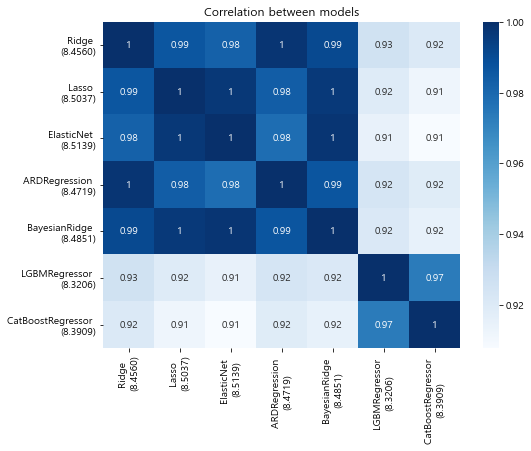

In [13]:
pred_results = []
for name, reg, reg_score in regs_trained:
    pred = list(reg.predict(x_dev_cat))
    name = f'{name} \n({reg_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

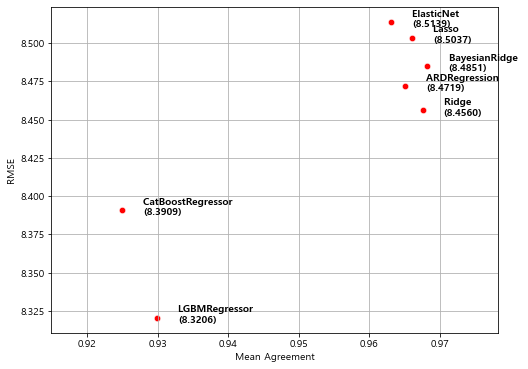

In [14]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [36]:
selected = [#'LinearRegression',
            'Ridge',
            #'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
for name, model in models_for_ensemble:
    results_for_ensemble.append(model.predict(x_dev_cat))
avg_test = (results_for_ensemble[0].flatten()+results_for_ensemble[1]+results_for_ensemble[2])/len(results_for_ensemble)
score = mean_squared_error(avg_test, y_dev, squared=False)
score

8.29285744409743

In [63]:
# 최적의 가중치 찾기 
selected = [#'LinearRegression',
            'Ridge',
            #'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 30, 1)):
    for j in range(1, 30, 1):
        for k in range(1, 30, 1):
            if (i+j+k) != 30:
                continue
            pred = (models_for_ensemble[0][1].predict(x_dev_cat).flatten() * i + models_for_ensemble[1][1].predict(x_dev_cat) * j
                    + models_for_ensemble[2][1].predict(x_dev_cat) * k)/30
            rmse = np.sqrt(mean_squared_error(y_dev, pred))
            if rmse < rmse_best:
                weights_avg = [i,j,k]
                rmse_best = rmse 
                print(rmse, i,j,k)            

print(rmse_best, weights_avg)

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

8.37438895635089 1 1 28
8.368325261299738 1 2 27
8.362546839309058 1 3 26
8.357054282128573 1 4 25
8.35184815375161 1 5 24
8.346928990130433 1 6 23
8.342297298904573 1 7 22
8.33795355914245 1 8 21
8.333898221096597 1 9 20
8.330131705972768 1 10 19
8.326654405713231 1 11 18
8.323466682794459 1 12 17
8.32056887003949 1 13 16
8.317961270445187 1 14 15
8.315644157024579 1 15 14
8.313617772664493 1 16 13
8.311882329998657 1 17 12
8.31043801129639 1 18 11
8.309284968367066 1 19 10
8.308423322480438 1 20 9
8.307853164302914 1 21 8
8.30757455384988 1 22 7


  3%|██▊                                                                                | 1/29 [01:28<41:25, 88.78s/it]

8.30713681477892 2 16 12
8.305584636788273 2 17 11
8.30432386966733 2 18 10
8.303354646158066 2 19 9
8.302677068361625 2 20 8
8.302291207684553 2 21 7
8.302197104801204 2 22 6


  7%|█████▋                                                                             | 2/29 [03:14<44:32, 98.99s/it]

8.301513231020794 3 16 11
8.300144741257748 3 17 10
8.299067911574108 3 18 9
8.298282855512001 3 19 8
8.297789655885765 3 20 7
8.297588364738289 3 21 6


 10%|████████▌                                                                          | 3/29 [03:50<30:23, 70.14s/it]

8.296748764789562 4 16 10
8.295564330934313 4 17 9
8.29467176839308 4 18 8
8.294071171394647 4 19 7
8.293762603367508 4 20 6
8.293746096906391 4 21 5


 14%|███████████▍                                                                       | 4/29 [04:23<23:01, 55.27s/it]

8.292844896844912 5 16 9
8.291844830155494 5 17 8
8.291136807802724 5 18 7
8.290720904607808 5 19 6
8.29059716453379 5 20 5


 17%|██████████████▎                                                                    | 5/29 [04:54<18:39, 46.65s/it]

8.289802843016352 6 16 8
8.288987397864043 6 17 7
8.288464131664613 6 18 6
8.288233099757015 6 19 5


 21%|█████████████████▏                                                                 | 6/29 [05:24<15:43, 41.03s/it]

8.28762355231601 7 16 7
8.286992925807716 7 17 6
8.286654574310809 7 18 5
8.286608533627035 7 19 4


 24%|████████████████████                                                               | 7/29 [05:53<13:32, 36.94s/it]

8.286307705461452 8 16 6
8.285862037150459 8 17 5
8.285708701243815 8 18 4


 28%|██████████████████████▉                                                            | 8/29 [06:33<13:14, 37.85s/it]

8.285595085499947 9 17 4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [13:53<00:00, 28.75s/it]

8.285595085499947 [9, 17, 4]


In [13]:
weights_avg = [9,17,4]

In [14]:
selected = [#'LinearRegression',
            'Ridge',
            #'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
i,j,k = weights_avg
avg_test_result = (models_for_ensemble[0][1].predict(x_dev_cat).flatten()*i + models_for_ensemble[1][1].predict(x_dev_cat)*j + 
       models_for_ensemble[2][1].predict(x_dev_cat)*k)/30

### Deep Neural Network
'dnn_cat.krs'

In [15]:
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(99)
    # seed를 잘 설정하면 성능이 더 잘 오른다.
    random.seed(9)
    tf.compat.v1.set_random_seed(16)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


In [16]:
i = int(round(x_train_cat2.shape[0] * 0.8,0))
x_val_cat, y_val = x_train_cat2[i:], y_train2[i:]
x_train_cat3, y_train3 = x_train_cat2[:i], y_train2[:i]

In [18]:
def model_fn(hp):
    inputs = tf.keras.Input(shape=(x_train_cat3.shape[1],))
    x = inputs
    for i in range(hp.Int('num_layers', 2, 4, step=1)):
        x = tf.keras.layers.Dense(hp.Int('unit_'+str(i), 16, 256, step=16),
                               activation=hp.Choice('activation',['relu','tanh']))(x)
        x = tf.keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.7, step=0.1, default=0.5))(x)
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])), 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# keras tuner는 튜닝 종류가 4종류가 있음: hyperband, grid search, random search, bayesian optimization
tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=30,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning')
# objective: 튜닝 기준, hyperband_iterations:이거 자체에서 2번 반복
# overwrite: False시, 기존을 근거로 해 재학습 안시킴

tuner.search(x_train_cat3, y_train3, validation_data=(x_val_cat, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping()])
# 빨리 끝내려고 파라미터 저렇게 설정한 것임

Trial 180 Complete [00h 00m 05s]
val_root_mean_squared_error: 10.236875534057617

Best val_root_mean_squared_error So Far: 8.278555870056152
Total elapsed time: 00h 16m 36s
INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.results_summary(1) # 1= 제일 성능이 좋은 놈

Results summary
Results in dnn_tuning\untitled_project
Showing 1 best trials
Objective(name='val_root_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
unit_0: 208
activation: tanh
dropout_0: 0.4
unit_1: 64
dropout_1: 0.0
learning_rate: 0.001
unit_2: 192
dropout_2: 0.1
unit_3: 176
dropout_3: 0.1
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 54cfd4ea972f7c0afef0af473cf1da72
Score: 8.278555870056152


In [21]:
# Loss & RMSE
dnn = tuner.get_best_models(1)[0] # best model 중 가장 좋은 모델
dnn.evaluate(x_dev_cat, y_dev)

203/203 [==============================] - 0s 1ms/step - loss: 69.6874 - root_mean_squared_error: 8.3474


[70.22325897216797, 8.379931449890137]

In [22]:
dnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 759)]             0         
_________________________________________________________________
dense (Dense)                (None, 208)               158080    
_________________________________________________________________
dropout (Dropout)            (None, 208)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                13376     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               12480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0     

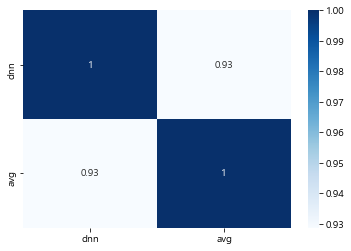

In [26]:
sns.heatmap(pd.DataFrame(dict(zip(['dnn','avg'],[dnn.predict(x_dev_cat).flatten(),avg_test_result]))).corr(), annot=True, cmap='Blues')
plt.show()

In [24]:
mean_squared_error((dnn.predict(x_dev_cat).flatten()+avg_test_result)/2,y_dev,squared=False)

8.251659252485998

In [27]:
weights_da = []
rmse_best = 1000
for i in tqdm(range(1,20)):
    for j in range(1,20):
        if i+j!=20:
            continue
        pred = (avg_test_result*i + dnn.predict(x_dev_cat).flatten()*j)/20
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_da = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)     
print(rmse_best, weights_da)

 11%|████████▋                                                                          | 2/19 [00:00<00:03,  5.04it/s]

8.359942499565461 1 19
8.341522323929631 2 18


 21%|█████████████████▍                                                                 | 4/19 [00:00<00:02,  5.13it/s]

8.324679912470668 3 17
8.309424944083919 4 16


 32%|██████████████████████████▏                                                        | 6/19 [00:01<00:02,  5.16it/s]

8.295766111431544 5 15
8.283711321841237 6 14


 42%|██████████████████████████████████▉                                                | 8/19 [00:01<00:02,  5.06it/s]

8.273267605095969 7 13
8.26444104302406 8 12


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:01<00:01,  4.95it/s]

8.257236847279017 9 11
8.251659252839142 10 10


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:02<00:01,  4.67it/s]

8.24771156378951 11 9


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:02<00:01,  4.66it/s]

8.245396122823475 12 8
8.244714302499277 13 7


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  4.82it/s]

8.244714302499277 [13, 7]


### Stacking

In [28]:
selected = [#'LinearRegression',
            'Ridge',
            #'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor'
            ]
stack_estimators = [reg for name,reg,score in regs_trained if name in selected]

In [31]:
S_train, S_test = stacking(stack_estimators,
                           x_train_cat, y_train, x_test_cat,
                           regression=True, n_folds=5, stratified=True, shuffle=True,
                           random_state=0, verbose=0)

Learning rate set to 0.064809
0:	learn: 10.2819415	total: 97.6ms	remaining: 1m 37s
1:	learn: 10.1501673	total: 195ms	remaining: 1m 37s
2:	learn: 10.0356721	total: 295ms	remaining: 1m 37s
3:	learn: 9.9243119	total: 391ms	remaining: 1m 37s
4:	learn: 9.8183118	total: 486ms	remaining: 1m 36s
5:	learn: 9.7235077	total: 587ms	remaining: 1m 37s
6:	learn: 9.6358068	total: 686ms	remaining: 1m 37s
7:	learn: 9.5593852	total: 792ms	remaining: 1m 38s
8:	learn: 9.4871797	total: 897ms	remaining: 1m 38s
9:	learn: 9.4183448	total: 994ms	remaining: 1m 38s
10:	learn: 9.3538641	total: 1.1s	remaining: 1m 38s
11:	learn: 9.2847341	total: 1.2s	remaining: 1m 39s
12:	learn: 9.2325804	total: 1.3s	remaining: 1m 38s
13:	learn: 9.1748001	total: 1.4s	remaining: 1m 38s
14:	learn: 9.1229298	total: 1.49s	remaining: 1m 37s
15:	learn: 9.0776639	total: 1.58s	remaining: 1m 37s
16:	learn: 9.0369424	total: 1.68s	remaining: 1m 37s
17:	learn: 8.9938810	total: 1.78s	remaining: 1m 37s
18:	learn: 8.9564933	total: 1.88s	remaining:

157:	learn: 7.8875679	total: 15.1s	remaining: 1m 20s
158:	learn: 7.8825273	total: 15.2s	remaining: 1m 20s
159:	learn: 7.8792610	total: 15.3s	remaining: 1m 20s
160:	learn: 7.8753745	total: 15.4s	remaining: 1m 20s
161:	learn: 7.8696438	total: 15.5s	remaining: 1m 20s
162:	learn: 7.8640348	total: 15.6s	remaining: 1m 20s
163:	learn: 7.8606919	total: 15.7s	remaining: 1m 19s
164:	learn: 7.8572004	total: 15.8s	remaining: 1m 19s
165:	learn: 7.8520756	total: 15.8s	remaining: 1m 19s
166:	learn: 7.8490937	total: 15.9s	remaining: 1m 19s
167:	learn: 7.8445455	total: 16s	remaining: 1m 19s
168:	learn: 7.8400256	total: 16.1s	remaining: 1m 19s
169:	learn: 7.8357424	total: 16.2s	remaining: 1m 19s
170:	learn: 7.8312391	total: 16.3s	remaining: 1m 19s
171:	learn: 7.8265751	total: 16.4s	remaining: 1m 18s
172:	learn: 7.8214106	total: 16.5s	remaining: 1m 18s
173:	learn: 7.8182578	total: 16.6s	remaining: 1m 18s
174:	learn: 7.8134706	total: 16.7s	remaining: 1m 18s
175:	learn: 7.8089627	total: 16.7s	remaining: 1m

314:	learn: 7.2666931	total: 29.7s	remaining: 1m 4s
315:	learn: 7.2636703	total: 29.8s	remaining: 1m 4s
316:	learn: 7.2592918	total: 29.9s	remaining: 1m 4s
317:	learn: 7.2563347	total: 30s	remaining: 1m 4s
318:	learn: 7.2536869	total: 30.1s	remaining: 1m 4s
319:	learn: 7.2500779	total: 30.2s	remaining: 1m 4s
320:	learn: 7.2473075	total: 30.3s	remaining: 1m 4s
321:	learn: 7.2432794	total: 30.4s	remaining: 1m 3s
322:	learn: 7.2390224	total: 30.5s	remaining: 1m 3s
323:	learn: 7.2357256	total: 30.6s	remaining: 1m 3s
324:	learn: 7.2328099	total: 30.7s	remaining: 1m 3s
325:	learn: 7.2292997	total: 30.7s	remaining: 1m 3s
326:	learn: 7.2244443	total: 30.8s	remaining: 1m 3s
327:	learn: 7.2213009	total: 30.9s	remaining: 1m 3s
328:	learn: 7.2178292	total: 31s	remaining: 1m 3s
329:	learn: 7.2143156	total: 31.1s	remaining: 1m 3s
330:	learn: 7.2114498	total: 31.2s	remaining: 1m 3s
331:	learn: 7.2082833	total: 31.3s	remaining: 1m 2s
332:	learn: 7.2047419	total: 31.4s	remaining: 1m 2s
333:	learn: 7.20

476:	learn: 6.7188813	total: 45s	remaining: 49.3s
477:	learn: 6.7153758	total: 45.1s	remaining: 49.2s
478:	learn: 6.7119197	total: 45.2s	remaining: 49.1s
479:	learn: 6.7091339	total: 45.3s	remaining: 49.1s
480:	learn: 6.7059849	total: 45.4s	remaining: 49s
481:	learn: 6.7040301	total: 45.5s	remaining: 48.9s
482:	learn: 6.7008249	total: 45.6s	remaining: 48.8s
483:	learn: 6.6971044	total: 45.6s	remaining: 48.7s
484:	learn: 6.6948131	total: 45.7s	remaining: 48.6s
485:	learn: 6.6925962	total: 45.8s	remaining: 48.5s
486:	learn: 6.6897840	total: 45.9s	remaining: 48.3s
487:	learn: 6.6863828	total: 46s	remaining: 48.3s
488:	learn: 6.6831277	total: 46.1s	remaining: 48.2s
489:	learn: 6.6807949	total: 46.2s	remaining: 48.1s
490:	learn: 6.6779688	total: 46.3s	remaining: 48s
491:	learn: 6.6751720	total: 46.4s	remaining: 47.9s
492:	learn: 6.6733222	total: 46.4s	remaining: 47.8s
493:	learn: 6.6698843	total: 46.5s	remaining: 47.7s
494:	learn: 6.6660442	total: 46.6s	remaining: 47.6s
495:	learn: 6.663695

636:	learn: 6.2588357	total: 59.7s	remaining: 34s
637:	learn: 6.2560958	total: 59.8s	remaining: 33.9s
638:	learn: 6.2529987	total: 59.9s	remaining: 33.8s
639:	learn: 6.2500838	total: 60s	remaining: 33.7s
640:	learn: 6.2481019	total: 1m	remaining: 33.6s
641:	learn: 6.2461535	total: 1m	remaining: 33.5s
642:	learn: 6.2428294	total: 1m	remaining: 33.4s
643:	learn: 6.2405351	total: 1m	remaining: 33.3s
644:	learn: 6.2371854	total: 1m	remaining: 33.2s
645:	learn: 6.2346717	total: 1m	remaining: 33.1s
646:	learn: 6.2316607	total: 1m	remaining: 33.1s
647:	learn: 6.2280559	total: 1m	remaining: 33s
648:	learn: 6.2251479	total: 1m	remaining: 32.9s
649:	learn: 6.2222540	total: 1m	remaining: 32.8s
650:	learn: 6.2185892	total: 1m	remaining: 32.7s
651:	learn: 6.2163271	total: 1m 1s	remaining: 32.6s
652:	learn: 6.2132925	total: 1m 1s	remaining: 32.5s
653:	learn: 6.2110677	total: 1m 1s	remaining: 32.4s
654:	learn: 6.2075689	total: 1m 1s	remaining: 32.3s
655:	learn: 6.2044448	total: 1m 1s	remaining: 32.2s

796:	learn: 5.8432860	total: 1m 14s	remaining: 18.9s
797:	learn: 5.8406078	total: 1m 14s	remaining: 18.9s
798:	learn: 5.8372286	total: 1m 14s	remaining: 18.8s
799:	learn: 5.8349435	total: 1m 14s	remaining: 18.7s
800:	learn: 5.8326845	total: 1m 14s	remaining: 18.6s
801:	learn: 5.8310070	total: 1m 14s	remaining: 18.5s
802:	learn: 5.8283266	total: 1m 14s	remaining: 18.4s
803:	learn: 5.8256707	total: 1m 15s	remaining: 18.3s
804:	learn: 5.8241970	total: 1m 15s	remaining: 18.2s
805:	learn: 5.8215591	total: 1m 15s	remaining: 18.1s
806:	learn: 5.8197698	total: 1m 15s	remaining: 18s
807:	learn: 5.8170351	total: 1m 15s	remaining: 17.9s
808:	learn: 5.8139168	total: 1m 15s	remaining: 17.8s
809:	learn: 5.8116068	total: 1m 15s	remaining: 17.7s
810:	learn: 5.8096158	total: 1m 15s	remaining: 17.6s
811:	learn: 5.8074566	total: 1m 15s	remaining: 17.5s
812:	learn: 5.8041304	total: 1m 15s	remaining: 17.4s
813:	learn: 5.8019668	total: 1m 15s	remaining: 17.4s
814:	learn: 5.7985846	total: 1m 16s	remaining: 1

952:	learn: 5.4576195	total: 1m 28s	remaining: 4.38s
953:	learn: 5.4550227	total: 1m 28s	remaining: 4.29s
954:	learn: 5.4530932	total: 1m 29s	remaining: 4.19s
955:	learn: 5.4499266	total: 1m 29s	remaining: 4.1s
956:	learn: 5.4477211	total: 1m 29s	remaining: 4.01s
957:	learn: 5.4453868	total: 1m 29s	remaining: 3.92s
958:	learn: 5.4430783	total: 1m 29s	remaining: 3.82s
959:	learn: 5.4403133	total: 1m 29s	remaining: 3.73s
960:	learn: 5.4387278	total: 1m 29s	remaining: 3.63s
961:	learn: 5.4371105	total: 1m 29s	remaining: 3.54s
962:	learn: 5.4348634	total: 1m 29s	remaining: 3.45s
963:	learn: 5.4333015	total: 1m 29s	remaining: 3.36s
964:	learn: 5.4308384	total: 1m 29s	remaining: 3.26s
965:	learn: 5.4284410	total: 1m 30s	remaining: 3.17s
966:	learn: 5.4261799	total: 1m 30s	remaining: 3.08s
967:	learn: 5.4238834	total: 1m 30s	remaining: 2.98s
968:	learn: 5.4222074	total: 1m 30s	remaining: 2.89s
969:	learn: 5.4201071	total: 1m 30s	remaining: 2.8s
970:	learn: 5.4169944	total: 1m 30s	remaining: 2

109:	learn: 8.1240207	total: 12s	remaining: 1m 37s
110:	learn: 8.1206834	total: 12.1s	remaining: 1m 37s
111:	learn: 8.1157529	total: 12.2s	remaining: 1m 36s
112:	learn: 8.1121334	total: 12.3s	remaining: 1m 36s
113:	learn: 8.1077222	total: 12.4s	remaining: 1m 36s
114:	learn: 8.1036830	total: 12.6s	remaining: 1m 36s
115:	learn: 8.0996541	total: 12.7s	remaining: 1m 36s
116:	learn: 8.0959781	total: 12.8s	remaining: 1m 36s
117:	learn: 8.0930172	total: 12.9s	remaining: 1m 36s
118:	learn: 8.0886850	total: 13s	remaining: 1m 36s
119:	learn: 8.0851584	total: 13.1s	remaining: 1m 36s
120:	learn: 8.0822872	total: 13.2s	remaining: 1m 36s
121:	learn: 8.0790223	total: 13.3s	remaining: 1m 36s
122:	learn: 8.0755700	total: 13.5s	remaining: 1m 35s
123:	learn: 8.0717680	total: 13.6s	remaining: 1m 35s
124:	learn: 8.0674022	total: 13.7s	remaining: 1m 35s
125:	learn: 8.0636470	total: 13.8s	remaining: 1m 35s
126:	learn: 8.0604692	total: 13.9s	remaining: 1m 35s
127:	learn: 8.0573724	total: 14s	remaining: 1m 35s

266:	learn: 7.5093051	total: 27.5s	remaining: 1m 15s
267:	learn: 7.5052569	total: 27.6s	remaining: 1m 15s
268:	learn: 7.5014475	total: 27.7s	remaining: 1m 15s
269:	learn: 7.4966424	total: 27.8s	remaining: 1m 15s
270:	learn: 7.4922018	total: 27.9s	remaining: 1m 15s
271:	learn: 7.4892439	total: 28s	remaining: 1m 15s
272:	learn: 7.4864139	total: 28.1s	remaining: 1m 14s
273:	learn: 7.4818639	total: 28.2s	remaining: 1m 14s
274:	learn: 7.4773767	total: 28.3s	remaining: 1m 14s
275:	learn: 7.4732172	total: 28.4s	remaining: 1m 14s
276:	learn: 7.4712147	total: 28.5s	remaining: 1m 14s
277:	learn: 7.4679027	total: 28.6s	remaining: 1m 14s
278:	learn: 7.4657982	total: 28.7s	remaining: 1m 14s
279:	learn: 7.4614769	total: 28.8s	remaining: 1m 13s
280:	learn: 7.4574535	total: 28.9s	remaining: 1m 13s
281:	learn: 7.4527909	total: 29s	remaining: 1m 13s
282:	learn: 7.4492328	total: 29.1s	remaining: 1m 13s
283:	learn: 7.4444136	total: 29.2s	remaining: 1m 13s
284:	learn: 7.4403758	total: 29.3s	remaining: 1m 1

426:	learn: 6.9508088	total: 43.6s	remaining: 58.5s
427:	learn: 6.9470926	total: 43.7s	remaining: 58.4s
428:	learn: 6.9439772	total: 43.8s	remaining: 58.3s
429:	learn: 6.9402356	total: 43.9s	remaining: 58.2s
430:	learn: 6.9357179	total: 44s	remaining: 58.1s
431:	learn: 6.9325340	total: 44.1s	remaining: 58s
432:	learn: 6.9295882	total: 44.2s	remaining: 57.9s
433:	learn: 6.9270025	total: 44.3s	remaining: 57.8s
434:	learn: 6.9232721	total: 44.4s	remaining: 57.7s
435:	learn: 6.9204932	total: 44.5s	remaining: 57.6s
436:	learn: 6.9165920	total: 44.6s	remaining: 57.5s
437:	learn: 6.9126005	total: 44.7s	remaining: 57.4s
438:	learn: 6.9108065	total: 44.8s	remaining: 57.3s
439:	learn: 6.9077290	total: 44.9s	remaining: 57.2s
440:	learn: 6.9037641	total: 45s	remaining: 57s
441:	learn: 6.9006771	total: 45.1s	remaining: 57s
442:	learn: 6.8987857	total: 45.2s	remaining: 56.8s
443:	learn: 6.8959207	total: 45.3s	remaining: 56.7s
444:	learn: 6.8932179	total: 45.4s	remaining: 56.6s
445:	learn: 6.8889979	

585:	learn: 6.4750383	total: 58.6s	remaining: 41.4s
586:	learn: 6.4713880	total: 58.7s	remaining: 41.3s
587:	learn: 6.4695603	total: 58.7s	remaining: 41.2s
588:	learn: 6.4674980	total: 58.8s	remaining: 41s
589:	learn: 6.4645613	total: 58.9s	remaining: 40.9s
590:	learn: 6.4617108	total: 59s	remaining: 40.8s
591:	learn: 6.4586606	total: 59.1s	remaining: 40.7s
592:	learn: 6.4558799	total: 59.2s	remaining: 40.6s
593:	learn: 6.4529976	total: 59.3s	remaining: 40.5s
594:	learn: 6.4503651	total: 59.4s	remaining: 40.4s
595:	learn: 6.4473878	total: 59.5s	remaining: 40.3s
596:	learn: 6.4444781	total: 59.6s	remaining: 40.2s
597:	learn: 6.4418623	total: 59.7s	remaining: 40.1s
598:	learn: 6.4389207	total: 59.8s	remaining: 40s
599:	learn: 6.4353015	total: 59.9s	remaining: 39.9s
600:	learn: 6.4329632	total: 60s	remaining: 39.8s
601:	learn: 6.4306268	total: 1m	remaining: 39.7s
602:	learn: 6.4268631	total: 1m	remaining: 39.6s
603:	learn: 6.4230864	total: 1m	remaining: 39.5s
604:	learn: 6.4202263	total: 

745:	learn: 6.0361175	total: 1m 13s	remaining: 25s
746:	learn: 6.0327019	total: 1m 13s	remaining: 24.9s
747:	learn: 6.0297387	total: 1m 13s	remaining: 24.8s
748:	learn: 6.0272039	total: 1m 13s	remaining: 24.7s
749:	learn: 6.0237452	total: 1m 13s	remaining: 24.6s
750:	learn: 6.0215448	total: 1m 13s	remaining: 24.5s
751:	learn: 6.0188195	total: 1m 13s	remaining: 24.4s
752:	learn: 6.0174511	total: 1m 14s	remaining: 24.3s
753:	learn: 6.0151152	total: 1m 14s	remaining: 24.2s
754:	learn: 6.0116539	total: 1m 14s	remaining: 24.1s
755:	learn: 6.0092898	total: 1m 14s	remaining: 24s
756:	learn: 6.0075155	total: 1m 14s	remaining: 23.9s
757:	learn: 6.0054538	total: 1m 14s	remaining: 23.8s
758:	learn: 6.0025730	total: 1m 14s	remaining: 23.7s
759:	learn: 6.0010007	total: 1m 14s	remaining: 23.6s
760:	learn: 5.9990255	total: 1m 14s	remaining: 23.5s
761:	learn: 5.9958666	total: 1m 14s	remaining: 23.4s
762:	learn: 5.9932281	total: 1m 14s	remaining: 23.3s
763:	learn: 5.9907674	total: 1m 15s	remaining: 23.

901:	learn: 5.6508954	total: 1m 28s	remaining: 9.64s
902:	learn: 5.6490728	total: 1m 28s	remaining: 9.54s
903:	learn: 5.6460660	total: 1m 28s	remaining: 9.44s
904:	learn: 5.6430913	total: 1m 29s	remaining: 9.35s
905:	learn: 5.6406749	total: 1m 29s	remaining: 9.25s
906:	learn: 5.6381745	total: 1m 29s	remaining: 9.15s
907:	learn: 5.6366404	total: 1m 29s	remaining: 9.05s
908:	learn: 5.6342591	total: 1m 29s	remaining: 8.95s
909:	learn: 5.6318596	total: 1m 29s	remaining: 8.86s
910:	learn: 5.6293942	total: 1m 29s	remaining: 8.76s
911:	learn: 5.6279796	total: 1m 29s	remaining: 8.66s
912:	learn: 5.6250588	total: 1m 29s	remaining: 8.56s
913:	learn: 5.6227242	total: 1m 29s	remaining: 8.46s
914:	learn: 5.6205764	total: 1m 30s	remaining: 8.36s
915:	learn: 5.6182686	total: 1m 30s	remaining: 8.26s
916:	learn: 5.6162243	total: 1m 30s	remaining: 8.16s
917:	learn: 5.6136687	total: 1m 30s	remaining: 8.07s
918:	learn: 5.6108762	total: 1m 30s	remaining: 7.97s
919:	learn: 5.6079570	total: 1m 30s	remaining:

57:	learn: 8.3703100	total: 5.72s	remaining: 1m 32s
58:	learn: 8.3638480	total: 5.81s	remaining: 1m 32s
59:	learn: 8.3568835	total: 5.92s	remaining: 1m 32s
60:	learn: 8.3513933	total: 6.01s	remaining: 1m 32s
61:	learn: 8.3439696	total: 6.11s	remaining: 1m 32s
62:	learn: 8.3378041	total: 6.2s	remaining: 1m 32s
63:	learn: 8.3330107	total: 6.29s	remaining: 1m 31s
64:	learn: 8.3267746	total: 6.37s	remaining: 1m 31s
65:	learn: 8.3208946	total: 6.47s	remaining: 1m 31s
66:	learn: 8.3155883	total: 6.57s	remaining: 1m 31s
67:	learn: 8.3077456	total: 6.66s	remaining: 1m 31s
68:	learn: 8.3000950	total: 6.75s	remaining: 1m 31s
69:	learn: 8.2934112	total: 6.84s	remaining: 1m 30s
70:	learn: 8.2872648	total: 6.93s	remaining: 1m 30s
71:	learn: 8.2821337	total: 7.03s	remaining: 1m 30s
72:	learn: 8.2760534	total: 7.12s	remaining: 1m 30s
73:	learn: 8.2705409	total: 7.21s	remaining: 1m 30s
74:	learn: 8.2654196	total: 7.32s	remaining: 1m 30s
75:	learn: 8.2603780	total: 7.41s	remaining: 1m 30s
76:	learn: 8.

214:	learn: 7.6673285	total: 22.2s	remaining: 1m 21s
215:	learn: 7.6629523	total: 22.3s	remaining: 1m 21s
216:	learn: 7.6592628	total: 22.5s	remaining: 1m 21s
217:	learn: 7.6541945	total: 22.5s	remaining: 1m 20s
218:	learn: 7.6492299	total: 22.6s	remaining: 1m 20s
219:	learn: 7.6437605	total: 22.8s	remaining: 1m 20s
220:	learn: 7.6396546	total: 22.9s	remaining: 1m 20s
221:	learn: 7.6355587	total: 23s	remaining: 1m 20s
222:	learn: 7.6305415	total: 23.1s	remaining: 1m 20s
223:	learn: 7.6254992	total: 23.2s	remaining: 1m 20s
224:	learn: 7.6221371	total: 23.3s	remaining: 1m 20s
225:	learn: 7.6177271	total: 23.4s	remaining: 1m 20s
226:	learn: 7.6140724	total: 23.6s	remaining: 1m 20s
227:	learn: 7.6090165	total: 23.6s	remaining: 1m 20s
228:	learn: 7.6054548	total: 23.8s	remaining: 1m 20s
229:	learn: 7.6003288	total: 23.9s	remaining: 1m 19s
230:	learn: 7.5957590	total: 24s	remaining: 1m 19s
231:	learn: 7.5912141	total: 24.1s	remaining: 1m 19s
232:	learn: 7.5880101	total: 24.2s	remaining: 1m 1

372:	learn: 7.0660048	total: 39s	remaining: 1m 5s
373:	learn: 7.0626584	total: 39.1s	remaining: 1m 5s
374:	learn: 7.0594917	total: 39.2s	remaining: 1m 5s
375:	learn: 7.0563197	total: 39.3s	remaining: 1m 5s
376:	learn: 7.0523628	total: 39.4s	remaining: 1m 5s
377:	learn: 7.0498354	total: 39.4s	remaining: 1m 4s
378:	learn: 7.0468698	total: 39.6s	remaining: 1m 4s
379:	learn: 7.0431625	total: 39.7s	remaining: 1m 4s
380:	learn: 7.0395870	total: 39.8s	remaining: 1m 4s
381:	learn: 7.0357885	total: 39.9s	remaining: 1m 4s
382:	learn: 7.0329896	total: 40s	remaining: 1m 4s
383:	learn: 7.0286603	total: 40.1s	remaining: 1m 4s
384:	learn: 7.0250745	total: 40.2s	remaining: 1m 4s
385:	learn: 7.0218137	total: 40.3s	remaining: 1m 4s
386:	learn: 7.0190382	total: 40.4s	remaining: 1m 3s
387:	learn: 7.0157434	total: 40.5s	remaining: 1m 3s
388:	learn: 7.0120219	total: 40.6s	remaining: 1m 3s
389:	learn: 7.0098493	total: 40.7s	remaining: 1m 3s
390:	learn: 7.0057584	total: 40.9s	remaining: 1m 3s
391:	learn: 7.00

534:	learn: 6.5454752	total: 55.9s	remaining: 48.6s
535:	learn: 6.5429576	total: 56s	remaining: 48.5s
536:	learn: 6.5408664	total: 56.1s	remaining: 48.4s
537:	learn: 6.5376967	total: 56.2s	remaining: 48.3s
538:	learn: 6.5349381	total: 56.3s	remaining: 48.1s
539:	learn: 6.5323532	total: 56.4s	remaining: 48s
540:	learn: 6.5287069	total: 56.5s	remaining: 47.9s
541:	learn: 6.5250040	total: 56.6s	remaining: 47.8s
542:	learn: 6.5222380	total: 56.7s	remaining: 47.7s
543:	learn: 6.5198016	total: 56.8s	remaining: 47.6s
544:	learn: 6.5181948	total: 56.9s	remaining: 47.5s
545:	learn: 6.5145783	total: 57s	remaining: 47.4s
546:	learn: 6.5119841	total: 57.1s	remaining: 47.3s
547:	learn: 6.5096364	total: 57.2s	remaining: 47.2s
548:	learn: 6.5066453	total: 57.3s	remaining: 47s
549:	learn: 6.5042350	total: 57.3s	remaining: 46.9s
550:	learn: 6.5021463	total: 57.4s	remaining: 46.8s
551:	learn: 6.5002027	total: 57.5s	remaining: 46.7s
552:	learn: 6.4978461	total: 57.6s	remaining: 46.6s
553:	learn: 6.495514

694:	learn: 6.0969581	total: 1m 12s	remaining: 31.7s
695:	learn: 6.0934714	total: 1m 12s	remaining: 31.6s
696:	learn: 6.0915160	total: 1m 12s	remaining: 31.5s
697:	learn: 6.0895853	total: 1m 12s	remaining: 31.4s
698:	learn: 6.0864271	total: 1m 12s	remaining: 31.3s
699:	learn: 6.0839543	total: 1m 12s	remaining: 31.2s
700:	learn: 6.0806638	total: 1m 12s	remaining: 31.1s
701:	learn: 6.0772690	total: 1m 12s	remaining: 31s
702:	learn: 6.0750036	total: 1m 13s	remaining: 30.9s
703:	learn: 6.0730246	total: 1m 13s	remaining: 30.8s
704:	learn: 6.0705184	total: 1m 13s	remaining: 30.7s
705:	learn: 6.0675637	total: 1m 13s	remaining: 30.6s
706:	learn: 6.0641954	total: 1m 13s	remaining: 30.5s
707:	learn: 6.0610887	total: 1m 13s	remaining: 30.4s
708:	learn: 6.0582681	total: 1m 13s	remaining: 30.3s
709:	learn: 6.0559518	total: 1m 13s	remaining: 30.2s
710:	learn: 6.0534509	total: 1m 13s	remaining: 30s
711:	learn: 6.0517198	total: 1m 14s	remaining: 29.9s
712:	learn: 6.0506341	total: 1m 14s	remaining: 29.

852:	learn: 5.6887905	total: 1m 28s	remaining: 15.3s
853:	learn: 5.6866505	total: 1m 28s	remaining: 15.2s
854:	learn: 5.6842734	total: 1m 28s	remaining: 15.1s
855:	learn: 5.6826738	total: 1m 29s	remaining: 15s
856:	learn: 5.6795166	total: 1m 29s	remaining: 14.9s
857:	learn: 5.6764706	total: 1m 29s	remaining: 14.8s
858:	learn: 5.6741081	total: 1m 29s	remaining: 14.7s
859:	learn: 5.6714341	total: 1m 29s	remaining: 14.6s
860:	learn: 5.6684212	total: 1m 29s	remaining: 14.4s
861:	learn: 5.6655707	total: 1m 29s	remaining: 14.3s
862:	learn: 5.6638801	total: 1m 29s	remaining: 14.2s
863:	learn: 5.6616087	total: 1m 29s	remaining: 14.1s
864:	learn: 5.6593715	total: 1m 29s	remaining: 14s
865:	learn: 5.6564157	total: 1m 29s	remaining: 13.9s
866:	learn: 5.6544759	total: 1m 30s	remaining: 13.8s
867:	learn: 5.6518267	total: 1m 30s	remaining: 13.7s
868:	learn: 5.6489198	total: 1m 30s	remaining: 13.6s
869:	learn: 5.6470243	total: 1m 30s	remaining: 13.5s
870:	learn: 5.6449364	total: 1m 30s	remaining: 13.

8:	learn: 9.4497077	total: 971ms	remaining: 1m 46s
9:	learn: 9.3801880	total: 1.09s	remaining: 1m 47s
10:	learn: 9.3179671	total: 1.21s	remaining: 1m 48s
11:	learn: 9.2600854	total: 1.33s	remaining: 1m 49s
12:	learn: 9.2036213	total: 1.44s	remaining: 1m 49s
13:	learn: 9.1503118	total: 1.57s	remaining: 1m 50s
14:	learn: 9.1072273	total: 1.68s	remaining: 1m 50s
15:	learn: 9.0607901	total: 1.79s	remaining: 1m 50s
16:	learn: 9.0172825	total: 1.9s	remaining: 1m 49s
17:	learn: 8.9745050	total: 2.01s	remaining: 1m 49s
18:	learn: 8.9377612	total: 2.11s	remaining: 1m 48s
19:	learn: 8.9045034	total: 2.22s	remaining: 1m 48s
20:	learn: 8.8750654	total: 2.31s	remaining: 1m 47s
21:	learn: 8.8430125	total: 2.42s	remaining: 1m 47s
22:	learn: 8.8157729	total: 2.53s	remaining: 1m 47s
23:	learn: 8.7872533	total: 2.63s	remaining: 1m 47s
24:	learn: 8.7635834	total: 2.74s	remaining: 1m 47s
25:	learn: 8.7392397	total: 2.85s	remaining: 1m 46s
26:	learn: 8.7189976	total: 2.95s	remaining: 1m 46s
27:	learn: 8.69

165:	learn: 7.8551209	total: 17.8s	remaining: 1m 29s
166:	learn: 7.8517613	total: 17.9s	remaining: 1m 29s
167:	learn: 7.8482181	total: 18s	remaining: 1m 29s
168:	learn: 7.8436351	total: 18.1s	remaining: 1m 29s
169:	learn: 7.8381062	total: 18.2s	remaining: 1m 28s
170:	learn: 7.8343003	total: 18.3s	remaining: 1m 28s
171:	learn: 7.8305008	total: 18.4s	remaining: 1m 28s
172:	learn: 7.8251371	total: 18.5s	remaining: 1m 28s
173:	learn: 7.8197024	total: 18.6s	remaining: 1m 28s
174:	learn: 7.8156278	total: 18.7s	remaining: 1m 28s
175:	learn: 7.8118276	total: 18.8s	remaining: 1m 28s
176:	learn: 7.8083303	total: 18.9s	remaining: 1m 28s
177:	learn: 7.8043157	total: 19s	remaining: 1m 27s
178:	learn: 7.7991421	total: 19.1s	remaining: 1m 27s
179:	learn: 7.7950566	total: 19.2s	remaining: 1m 27s
180:	learn: 7.7899654	total: 19.3s	remaining: 1m 27s
181:	learn: 7.7850086	total: 19.4s	remaining: 1m 27s
182:	learn: 7.7814085	total: 19.5s	remaining: 1m 27s
183:	learn: 7.7762187	total: 19.6s	remaining: 1m 2

322:	learn: 7.2308477	total: 35.3s	remaining: 1m 13s
323:	learn: 7.2266476	total: 35.4s	remaining: 1m 13s
324:	learn: 7.2225979	total: 35.5s	remaining: 1m 13s
325:	learn: 7.2197107	total: 35.6s	remaining: 1m 13s
326:	learn: 7.2161360	total: 35.7s	remaining: 1m 13s
327:	learn: 7.2126933	total: 35.8s	remaining: 1m 13s
328:	learn: 7.2085270	total: 35.9s	remaining: 1m 13s
329:	learn: 7.2047840	total: 36s	remaining: 1m 13s
330:	learn: 7.2031739	total: 36.1s	remaining: 1m 12s
331:	learn: 7.1997770	total: 36.2s	remaining: 1m 12s
332:	learn: 7.1968717	total: 36.3s	remaining: 1m 12s
333:	learn: 7.1943147	total: 36.4s	remaining: 1m 12s
334:	learn: 7.1916231	total: 36.5s	remaining: 1m 12s
335:	learn: 7.1878580	total: 36.6s	remaining: 1m 12s
336:	learn: 7.1845291	total: 36.7s	remaining: 1m 12s
337:	learn: 7.1818514	total: 36.8s	remaining: 1m 12s
338:	learn: 7.1779697	total: 36.9s	remaining: 1m 11s
339:	learn: 7.1738916	total: 37s	remaining: 1m 11s
340:	learn: 7.1703004	total: 37.1s	remaining: 1m 1

482:	learn: 6.7269834	total: 52.6s	remaining: 56.3s
483:	learn: 6.7231935	total: 52.7s	remaining: 56.2s
484:	learn: 6.7192007	total: 52.8s	remaining: 56.1s
485:	learn: 6.7165019	total: 52.9s	remaining: 56s
486:	learn: 6.7142008	total: 53s	remaining: 55.8s
487:	learn: 6.7107088	total: 53.1s	remaining: 55.7s
488:	learn: 6.7072372	total: 53.2s	remaining: 55.6s
489:	learn: 6.7044801	total: 53.3s	remaining: 55.5s
490:	learn: 6.7022980	total: 53.4s	remaining: 55.4s
491:	learn: 6.6999867	total: 53.5s	remaining: 55.3s
492:	learn: 6.6965896	total: 53.6s	remaining: 55.2s
493:	learn: 6.6924696	total: 53.7s	remaining: 55s
494:	learn: 6.6883847	total: 53.8s	remaining: 54.9s
495:	learn: 6.6859849	total: 53.9s	remaining: 54.8s
496:	learn: 6.6821142	total: 54.1s	remaining: 54.7s
497:	learn: 6.6783979	total: 54.2s	remaining: 54.6s
498:	learn: 6.6754881	total: 54.3s	remaining: 54.5s
499:	learn: 6.6725804	total: 54.4s	remaining: 54.4s
500:	learn: 6.6693056	total: 54.5s	remaining: 54.3s
501:	learn: 6.6661

641:	learn: 6.2349053	total: 1m 9s	remaining: 39s
642:	learn: 6.2315824	total: 1m 10s	remaining: 38.9s
643:	learn: 6.2297950	total: 1m 10s	remaining: 38.8s
644:	learn: 6.2285193	total: 1m 10s	remaining: 38.7s
645:	learn: 6.2261494	total: 1m 10s	remaining: 38.6s
646:	learn: 6.2243875	total: 1m 10s	remaining: 38.6s
647:	learn: 6.2214428	total: 1m 10s	remaining: 38.5s
648:	learn: 6.2192051	total: 1m 10s	remaining: 38.4s
649:	learn: 6.2162869	total: 1m 11s	remaining: 38.3s
650:	learn: 6.2134315	total: 1m 11s	remaining: 38.2s
651:	learn: 6.2104799	total: 1m 11s	remaining: 38.1s
652:	learn: 6.2068579	total: 1m 11s	remaining: 38s
653:	learn: 6.2042870	total: 1m 11s	remaining: 38s
654:	learn: 6.2019622	total: 1m 12s	remaining: 37.9s
655:	learn: 6.1993943	total: 1m 12s	remaining: 37.9s
656:	learn: 6.1958654	total: 1m 12s	remaining: 37.9s
657:	learn: 6.1928462	total: 1m 12s	remaining: 37.8s
658:	learn: 6.1892729	total: 1m 12s	remaining: 37.7s
659:	learn: 6.1876705	total: 1m 13s	remaining: 37.6s


798:	learn: 5.8138888	total: 1m 29s	remaining: 22.6s
799:	learn: 5.8111820	total: 1m 30s	remaining: 22.5s
800:	learn: 5.8090951	total: 1m 30s	remaining: 22.4s
801:	learn: 5.8075644	total: 1m 30s	remaining: 22.3s
802:	learn: 5.8046544	total: 1m 30s	remaining: 22.2s
803:	learn: 5.8020559	total: 1m 30s	remaining: 22s
804:	learn: 5.7999128	total: 1m 30s	remaining: 21.9s
805:	learn: 5.7978924	total: 1m 30s	remaining: 21.8s
806:	learn: 5.7951530	total: 1m 30s	remaining: 21.7s
807:	learn: 5.7928313	total: 1m 30s	remaining: 21.6s
808:	learn: 5.7910922	total: 1m 30s	remaining: 21.5s
809:	learn: 5.7886202	total: 1m 31s	remaining: 21.4s
810:	learn: 5.7861130	total: 1m 31s	remaining: 21.2s
811:	learn: 5.7849922	total: 1m 31s	remaining: 21.1s
812:	learn: 5.7829665	total: 1m 31s	remaining: 21s
813:	learn: 5.7803907	total: 1m 31s	remaining: 20.9s
814:	learn: 5.7779293	total: 1m 31s	remaining: 20.8s
815:	learn: 5.7749079	total: 1m 31s	remaining: 20.7s
816:	learn: 5.7723138	total: 1m 31s	remaining: 20.

954:	learn: 5.4332608	total: 1m 46s	remaining: 5s
955:	learn: 5.4308151	total: 1m 46s	remaining: 4.88s
956:	learn: 5.4288236	total: 1m 46s	remaining: 4.77s
957:	learn: 5.4264594	total: 1m 46s	remaining: 4.66s
958:	learn: 5.4234146	total: 1m 46s	remaining: 4.55s
959:	learn: 5.4211988	total: 1m 46s	remaining: 4.44s
960:	learn: 5.4189337	total: 1m 46s	remaining: 4.33s
961:	learn: 5.4158977	total: 1m 46s	remaining: 4.21s
962:	learn: 5.4136002	total: 1m 46s	remaining: 4.1s
963:	learn: 5.4120435	total: 1m 46s	remaining: 3.99s
964:	learn: 5.4099655	total: 1m 47s	remaining: 3.88s
965:	learn: 5.4070795	total: 1m 47s	remaining: 3.77s
966:	learn: 5.4050823	total: 1m 47s	remaining: 3.66s
967:	learn: 5.4019762	total: 1m 47s	remaining: 3.55s
968:	learn: 5.3996573	total: 1m 47s	remaining: 3.44s
969:	learn: 5.3980342	total: 1m 47s	remaining: 3.32s
970:	learn: 5.3967104	total: 1m 47s	remaining: 3.21s
971:	learn: 5.3940288	total: 1m 47s	remaining: 3.1s
972:	learn: 5.3920218	total: 1m 47s	remaining: 2.99

111:	learn: 8.1119994	total: 10.3s	remaining: 1m 22s
112:	learn: 8.1080740	total: 10.4s	remaining: 1m 21s
113:	learn: 8.1045874	total: 10.5s	remaining: 1m 21s
114:	learn: 8.1002695	total: 10.6s	remaining: 1m 21s
115:	learn: 8.0951900	total: 10.7s	remaining: 1m 21s
116:	learn: 8.0910120	total: 10.8s	remaining: 1m 21s
117:	learn: 8.0881823	total: 10.9s	remaining: 1m 21s
118:	learn: 8.0852340	total: 10.9s	remaining: 1m 21s
119:	learn: 8.0814539	total: 11s	remaining: 1m 20s
120:	learn: 8.0779779	total: 11.1s	remaining: 1m 20s
121:	learn: 8.0731087	total: 11.2s	remaining: 1m 20s
122:	learn: 8.0693153	total: 11.3s	remaining: 1m 20s
123:	learn: 8.0646381	total: 11.4s	remaining: 1m 20s
124:	learn: 8.0604240	total: 11.5s	remaining: 1m 20s
125:	learn: 8.0559170	total: 11.6s	remaining: 1m 20s
126:	learn: 8.0524092	total: 11.7s	remaining: 1m 20s
127:	learn: 8.0481833	total: 11.8s	remaining: 1m 20s
128:	learn: 8.0443525	total: 11.9s	remaining: 1m 20s
129:	learn: 8.0396117	total: 12s	remaining: 1m 2

268:	learn: 7.4755927	total: 24.7s	remaining: 1m 7s
269:	learn: 7.4722935	total: 24.7s	remaining: 1m 6s
270:	learn: 7.4682218	total: 24.8s	remaining: 1m 6s
271:	learn: 7.4657015	total: 24.9s	remaining: 1m 6s
272:	learn: 7.4627855	total: 25s	remaining: 1m 6s
273:	learn: 7.4597289	total: 25.1s	remaining: 1m 6s
274:	learn: 7.4564145	total: 25.2s	remaining: 1m 6s
275:	learn: 7.4522268	total: 25.3s	remaining: 1m 6s
276:	learn: 7.4479592	total: 25.4s	remaining: 1m 6s
277:	learn: 7.4444350	total: 25.5s	remaining: 1m 6s
278:	learn: 7.4404834	total: 25.6s	remaining: 1m 6s
279:	learn: 7.4363443	total: 25.6s	remaining: 1m 5s
280:	learn: 7.4318641	total: 25.7s	remaining: 1m 5s
281:	learn: 7.4275807	total: 25.8s	remaining: 1m 5s
282:	learn: 7.4237952	total: 25.9s	remaining: 1m 5s
283:	learn: 7.4188563	total: 26s	remaining: 1m 5s
284:	learn: 7.4161890	total: 26.1s	remaining: 1m 5s
285:	learn: 7.4128047	total: 26.2s	remaining: 1m 5s
286:	learn: 7.4092204	total: 26.3s	remaining: 1m 5s
287:	learn: 7.40

430:	learn: 6.9117817	total: 40s	remaining: 52.8s
431:	learn: 6.9084606	total: 40.1s	remaining: 52.7s
432:	learn: 6.9058614	total: 40.2s	remaining: 52.6s
433:	learn: 6.9012493	total: 40.3s	remaining: 52.5s
434:	learn: 6.8981199	total: 40.4s	remaining: 52.4s
435:	learn: 6.8950242	total: 40.4s	remaining: 52.3s
436:	learn: 6.8913336	total: 40.5s	remaining: 52.2s
437:	learn: 6.8891496	total: 40.6s	remaining: 52.1s
438:	learn: 6.8847146	total: 40.7s	remaining: 52s
439:	learn: 6.8809760	total: 40.8s	remaining: 52s
440:	learn: 6.8769946	total: 40.9s	remaining: 51.9s
441:	learn: 6.8743244	total: 41s	remaining: 51.8s
442:	learn: 6.8714838	total: 41.1s	remaining: 51.7s
443:	learn: 6.8690738	total: 41.2s	remaining: 51.6s
444:	learn: 6.8656661	total: 41.3s	remaining: 51.5s
445:	learn: 6.8616590	total: 41.4s	remaining: 51.5s
446:	learn: 6.8582580	total: 41.5s	remaining: 51.4s
447:	learn: 6.8555653	total: 41.6s	remaining: 51.3s
448:	learn: 6.8523781	total: 41.7s	remaining: 51.2s
449:	learn: 6.849645

589:	learn: 6.4239362	total: 55.7s	remaining: 38.7s
590:	learn: 6.4210109	total: 55.8s	remaining: 38.6s
591:	learn: 6.4186654	total: 55.9s	remaining: 38.5s
592:	learn: 6.4156206	total: 56s	remaining: 38.4s
593:	learn: 6.4128764	total: 56.1s	remaining: 38.3s
594:	learn: 6.4091539	total: 56.2s	remaining: 38.2s
595:	learn: 6.4063780	total: 56.3s	remaining: 38.1s
596:	learn: 6.4044578	total: 56.4s	remaining: 38s
597:	learn: 6.4021347	total: 56.5s	remaining: 37.9s
598:	learn: 6.3987952	total: 56.6s	remaining: 37.9s
599:	learn: 6.3965059	total: 56.7s	remaining: 37.8s
600:	learn: 6.3929999	total: 56.8s	remaining: 37.7s
601:	learn: 6.3904912	total: 56.8s	remaining: 37.6s
602:	learn: 6.3869406	total: 56.9s	remaining: 37.5s
603:	learn: 6.3843105	total: 57s	remaining: 37.4s
604:	learn: 6.3814131	total: 57.1s	remaining: 37.3s
605:	learn: 6.3783582	total: 57.2s	remaining: 37.2s
606:	learn: 6.3748126	total: 57.3s	remaining: 37.1s
607:	learn: 6.3726078	total: 57.4s	remaining: 37s
608:	learn: 6.369465

749:	learn: 5.9917101	total: 1m 10s	remaining: 23.6s
750:	learn: 5.9881795	total: 1m 11s	remaining: 23.5s
751:	learn: 5.9863053	total: 1m 11s	remaining: 23.4s
752:	learn: 5.9836822	total: 1m 11s	remaining: 23.4s
753:	learn: 5.9812302	total: 1m 11s	remaining: 23.3s
754:	learn: 5.9787560	total: 1m 11s	remaining: 23.2s
755:	learn: 5.9761750	total: 1m 11s	remaining: 23.1s
756:	learn: 5.9728634	total: 1m 11s	remaining: 23s
757:	learn: 5.9694231	total: 1m 11s	remaining: 22.9s
758:	learn: 5.9672899	total: 1m 11s	remaining: 22.8s
759:	learn: 5.9643820	total: 1m 11s	remaining: 22.7s
760:	learn: 5.9621478	total: 1m 11s	remaining: 22.6s
761:	learn: 5.9599393	total: 1m 12s	remaining: 22.5s
762:	learn: 5.9575541	total: 1m 12s	remaining: 22.4s
763:	learn: 5.9550786	total: 1m 12s	remaining: 22.3s
764:	learn: 5.9535979	total: 1m 12s	remaining: 22.2s
765:	learn: 5.9501043	total: 1m 12s	remaining: 22.1s
766:	learn: 5.9481113	total: 1m 12s	remaining: 22s
767:	learn: 5.9455837	total: 1m 12s	remaining: 21.

907:	learn: 5.5943437	total: 1m 25s	remaining: 8.63s
908:	learn: 5.5917539	total: 1m 25s	remaining: 8.53s
909:	learn: 5.5893323	total: 1m 25s	remaining: 8.44s
910:	learn: 5.5873952	total: 1m 25s	remaining: 8.35s
911:	learn: 5.5841280	total: 1m 25s	remaining: 8.25s
912:	learn: 5.5813146	total: 1m 25s	remaining: 8.16s
913:	learn: 5.5788619	total: 1m 25s	remaining: 8.06s
914:	learn: 5.5761503	total: 1m 25s	remaining: 7.97s
915:	learn: 5.5730376	total: 1m 25s	remaining: 7.88s
916:	learn: 5.5702855	total: 1m 26s	remaining: 7.78s
917:	learn: 5.5668956	total: 1m 26s	remaining: 7.69s
918:	learn: 5.5644748	total: 1m 26s	remaining: 7.59s
919:	learn: 5.5628862	total: 1m 26s	remaining: 7.5s
920:	learn: 5.5600398	total: 1m 26s	remaining: 7.41s
921:	learn: 5.5580135	total: 1m 26s	remaining: 7.31s
922:	learn: 5.5562306	total: 1m 26s	remaining: 7.22s
923:	learn: 5.5537957	total: 1m 26s	remaining: 7.12s
924:	learn: 5.5506383	total: 1m 26s	remaining: 7.03s
925:	learn: 5.5491920	total: 1m 26s	remaining: 

In [83]:
S_train2, S_dev = stacking(stack_estimators,
                           x_train_cat2, y_train2, x_dev_cat,
                           regression=True, n_folds=5, stratified=True, shuffle=True,
                           random_state=0, verbose=0)

Learning rate set to 0.060822
0:	learn: 10.2738355	total: 85.2ms	remaining: 1m 25s
1:	learn: 10.1376464	total: 156ms	remaining: 1m 17s
2:	learn: 10.0244575	total: 235ms	remaining: 1m 18s
3:	learn: 9.9119002	total: 320ms	remaining: 1m 19s
4:	learn: 9.8093100	total: 395ms	remaining: 1m 18s
5:	learn: 9.7220498	total: 468ms	remaining: 1m 17s
6:	learn: 9.6340201	total: 541ms	remaining: 1m 16s
7:	learn: 9.5485258	total: 611ms	remaining: 1m 15s
8:	learn: 9.4638302	total: 681ms	remaining: 1m 14s
9:	learn: 9.3912713	total: 755ms	remaining: 1m 14s
10:	learn: 9.3240764	total: 826ms	remaining: 1m 14s
11:	learn: 9.2568953	total: 896ms	remaining: 1m 13s
12:	learn: 9.1989730	total: 973ms	remaining: 1m 13s
13:	learn: 9.1391077	total: 1.04s	remaining: 1m 13s
14:	learn: 9.0915835	total: 1.12s	remaining: 1m 13s
15:	learn: 9.0432004	total: 1.19s	remaining: 1m 13s
16:	learn: 9.0007332	total: 1.26s	remaining: 1m 12s
17:	learn: 8.9567774	total: 1.33s	remaining: 1m 12s
18:	learn: 8.9212824	total: 1.41s	remain

158:	learn: 7.6886793	total: 12.9s	remaining: 1m 8s
159:	learn: 7.6845036	total: 13s	remaining: 1m 8s
160:	learn: 7.6799293	total: 13.1s	remaining: 1m 8s
161:	learn: 7.6748388	total: 13.2s	remaining: 1m 8s
162:	learn: 7.6707265	total: 13.2s	remaining: 1m 7s
163:	learn: 7.6670260	total: 13.3s	remaining: 1m 7s
164:	learn: 7.6610455	total: 13.4s	remaining: 1m 7s
165:	learn: 7.6561904	total: 13.4s	remaining: 1m 7s
166:	learn: 7.6512622	total: 13.5s	remaining: 1m 7s
167:	learn: 7.6458994	total: 13.6s	remaining: 1m 7s
168:	learn: 7.6427400	total: 13.7s	remaining: 1m 7s
169:	learn: 7.6376069	total: 13.7s	remaining: 1m 7s
170:	learn: 7.6338583	total: 13.8s	remaining: 1m 6s
171:	learn: 7.6271495	total: 13.9s	remaining: 1m 6s
172:	learn: 7.6240869	total: 14s	remaining: 1m 6s
173:	learn: 7.6181318	total: 14.1s	remaining: 1m 6s
174:	learn: 7.6126965	total: 14.1s	remaining: 1m 6s
175:	learn: 7.6086218	total: 14.2s	remaining: 1m 6s
176:	learn: 7.6026179	total: 14.3s	remaining: 1m 6s
177:	learn: 7.59

320:	learn: 6.9487118	total: 25.4s	remaining: 53.8s
321:	learn: 6.9443790	total: 25.5s	remaining: 53.7s
322:	learn: 6.9410282	total: 25.6s	remaining: 53.6s
323:	learn: 6.9371552	total: 25.7s	remaining: 53.5s
324:	learn: 6.9329743	total: 25.7s	remaining: 53.5s
325:	learn: 6.9277044	total: 25.8s	remaining: 53.4s
326:	learn: 6.9247397	total: 25.9s	remaining: 53.3s
327:	learn: 6.9205987	total: 26s	remaining: 53.2s
328:	learn: 6.9169399	total: 26s	remaining: 53.1s
329:	learn: 6.9120304	total: 26.1s	remaining: 53s
330:	learn: 6.9090870	total: 26.2s	remaining: 52.9s
331:	learn: 6.9054911	total: 26.3s	remaining: 52.8s
332:	learn: 6.8994838	total: 26.3s	remaining: 52.8s
333:	learn: 6.8957619	total: 26.4s	remaining: 52.7s
334:	learn: 6.8915529	total: 26.5s	remaining: 52.6s
335:	learn: 6.8867762	total: 26.5s	remaining: 52.5s
336:	learn: 6.8844402	total: 26.6s	remaining: 52.4s
337:	learn: 6.8803381	total: 26.7s	remaining: 52.3s
338:	learn: 6.8767099	total: 26.8s	remaining: 52.2s
339:	learn: 6.8725

479:	learn: 6.3256088	total: 37.6s	remaining: 40.7s
480:	learn: 6.3229251	total: 37.6s	remaining: 40.6s
481:	learn: 6.3191951	total: 37.7s	remaining: 40.5s
482:	learn: 6.3149849	total: 37.8s	remaining: 40.4s
483:	learn: 6.3120488	total: 37.8s	remaining: 40.3s
484:	learn: 6.3081223	total: 37.9s	remaining: 40.3s
485:	learn: 6.3044065	total: 38s	remaining: 40.2s
486:	learn: 6.2999982	total: 38.1s	remaining: 40.1s
487:	learn: 6.2977694	total: 38.2s	remaining: 40s
488:	learn: 6.2950319	total: 38.3s	remaining: 40s
489:	learn: 6.2912997	total: 38.3s	remaining: 39.9s
490:	learn: 6.2883113	total: 38.4s	remaining: 39.8s
491:	learn: 6.2846802	total: 38.5s	remaining: 39.7s
492:	learn: 6.2816429	total: 38.6s	remaining: 39.6s
493:	learn: 6.2767491	total: 38.6s	remaining: 39.6s
494:	learn: 6.2736501	total: 38.7s	remaining: 39.5s
495:	learn: 6.2702338	total: 38.8s	remaining: 39.4s
496:	learn: 6.2652651	total: 38.8s	remaining: 39.3s
497:	learn: 6.2621127	total: 38.9s	remaining: 39.2s
498:	learn: 6.2593

638:	learn: 5.7843217	total: 49.6s	remaining: 28s
639:	learn: 5.7818146	total: 49.7s	remaining: 28s
640:	learn: 5.7792442	total: 49.8s	remaining: 27.9s
641:	learn: 5.7754042	total: 49.9s	remaining: 27.8s
642:	learn: 5.7727295	total: 49.9s	remaining: 27.7s
643:	learn: 5.7696560	total: 50s	remaining: 27.6s
644:	learn: 5.7665815	total: 50.1s	remaining: 27.6s
645:	learn: 5.7635332	total: 50.2s	remaining: 27.5s
646:	learn: 5.7599628	total: 50.2s	remaining: 27.4s
647:	learn: 5.7564466	total: 50.3s	remaining: 27.3s
648:	learn: 5.7531928	total: 50.4s	remaining: 27.2s
649:	learn: 5.7499877	total: 50.5s	remaining: 27.2s
650:	learn: 5.7471882	total: 50.5s	remaining: 27.1s
651:	learn: 5.7443646	total: 50.6s	remaining: 27s
652:	learn: 5.7417932	total: 50.7s	remaining: 26.9s
653:	learn: 5.7388629	total: 50.7s	remaining: 26.8s
654:	learn: 5.7365279	total: 50.8s	remaining: 26.8s
655:	learn: 5.7322608	total: 50.9s	remaining: 26.7s
656:	learn: 5.7288229	total: 51s	remaining: 26.6s
657:	learn: 5.7267615	

799:	learn: 5.2953636	total: 1m 2s	remaining: 15.5s
800:	learn: 5.2927508	total: 1m 2s	remaining: 15.4s
801:	learn: 5.2902674	total: 1m 2s	remaining: 15.4s
802:	learn: 5.2874550	total: 1m 2s	remaining: 15.3s
803:	learn: 5.2845650	total: 1m 2s	remaining: 15.2s
804:	learn: 5.2825690	total: 1m 2s	remaining: 15.1s
805:	learn: 5.2795395	total: 1m 2s	remaining: 15s
806:	learn: 5.2766629	total: 1m 2s	remaining: 15s
807:	learn: 5.2740856	total: 1m 2s	remaining: 14.9s
808:	learn: 5.2721720	total: 1m 2s	remaining: 14.8s
809:	learn: 5.2704948	total: 1m 2s	remaining: 14.7s
810:	learn: 5.2669441	total: 1m 2s	remaining: 14.7s
811:	learn: 5.2639232	total: 1m 2s	remaining: 14.6s
812:	learn: 5.2605472	total: 1m 3s	remaining: 14.5s
813:	learn: 5.2580303	total: 1m 3s	remaining: 14.4s
814:	learn: 5.2560150	total: 1m 3s	remaining: 14.3s
815:	learn: 5.2532215	total: 1m 3s	remaining: 14.3s
816:	learn: 5.2510316	total: 1m 3s	remaining: 14.2s
817:	learn: 5.2480686	total: 1m 3s	remaining: 14.1s
818:	learn: 5.24

958:	learn: 4.8610198	total: 1m 14s	remaining: 3.2s
959:	learn: 4.8584153	total: 1m 14s	remaining: 3.12s
960:	learn: 4.8557648	total: 1m 14s	remaining: 3.04s
961:	learn: 4.8541081	total: 1m 15s	remaining: 2.96s
962:	learn: 4.8514980	total: 1m 15s	remaining: 2.89s
963:	learn: 4.8488252	total: 1m 15s	remaining: 2.81s
964:	learn: 4.8464488	total: 1m 15s	remaining: 2.73s
965:	learn: 4.8452176	total: 1m 15s	remaining: 2.65s
966:	learn: 4.8416122	total: 1m 15s	remaining: 2.58s
967:	learn: 4.8383371	total: 1m 15s	remaining: 2.5s
968:	learn: 4.8357949	total: 1m 15s	remaining: 2.42s
969:	learn: 4.8342109	total: 1m 15s	remaining: 2.34s
970:	learn: 4.8310539	total: 1m 15s	remaining: 2.26s
971:	learn: 4.8284797	total: 1m 15s	remaining: 2.19s
972:	learn: 4.8260301	total: 1m 15s	remaining: 2.11s
973:	learn: 4.8224596	total: 1m 16s	remaining: 2.03s
974:	learn: 4.8196608	total: 1m 16s	remaining: 1.95s
975:	learn: 4.8161622	total: 1m 16s	remaining: 1.88s
976:	learn: 4.8128636	total: 1m 16s	remaining: 1

115:	learn: 8.0006966	total: 9.04s	remaining: 1m 8s
116:	learn: 7.9960753	total: 9.12s	remaining: 1m 8s
117:	learn: 7.9908746	total: 9.2s	remaining: 1m 8s
118:	learn: 7.9862456	total: 9.28s	remaining: 1m 8s
119:	learn: 7.9805241	total: 9.35s	remaining: 1m 8s
120:	learn: 7.9756123	total: 9.43s	remaining: 1m 8s
121:	learn: 7.9709114	total: 9.51s	remaining: 1m 8s
122:	learn: 7.9667003	total: 9.58s	remaining: 1m 8s
123:	learn: 7.9626769	total: 9.66s	remaining: 1m 8s
124:	learn: 7.9589582	total: 9.73s	remaining: 1m 8s
125:	learn: 7.9547788	total: 9.82s	remaining: 1m 8s
126:	learn: 7.9488713	total: 9.9s	remaining: 1m 8s
127:	learn: 7.9453054	total: 9.98s	remaining: 1m 7s
128:	learn: 7.9404422	total: 10.1s	remaining: 1m 7s
129:	learn: 7.9359586	total: 10.1s	remaining: 1m 7s
130:	learn: 7.9316736	total: 10.2s	remaining: 1m 7s
131:	learn: 7.9270577	total: 10.3s	remaining: 1m 7s
132:	learn: 7.9234322	total: 10.4s	remaining: 1m 7s
133:	learn: 7.9186679	total: 10.4s	remaining: 1m 7s
134:	learn: 7.

276:	learn: 7.2293296	total: 22s	remaining: 57.5s
277:	learn: 7.2262282	total: 22.1s	remaining: 57.4s
278:	learn: 7.2211818	total: 22.2s	remaining: 57.4s
279:	learn: 7.2170253	total: 22.3s	remaining: 57.3s
280:	learn: 7.2129993	total: 22.4s	remaining: 57.3s
281:	learn: 7.2070787	total: 22.5s	remaining: 57.2s
282:	learn: 7.2031758	total: 22.6s	remaining: 57.1s
283:	learn: 7.1968931	total: 22.6s	remaining: 57.1s
284:	learn: 7.1935430	total: 22.7s	remaining: 57s
285:	learn: 7.1893688	total: 22.8s	remaining: 57s
286:	learn: 7.1849220	total: 22.9s	remaining: 56.9s
287:	learn: 7.1804829	total: 23s	remaining: 56.9s
288:	learn: 7.1757613	total: 23.1s	remaining: 56.8s
289:	learn: 7.1726412	total: 23.2s	remaining: 56.7s
290:	learn: 7.1669362	total: 23.3s	remaining: 56.7s
291:	learn: 7.1629111	total: 23.3s	remaining: 56.6s
292:	learn: 7.1596973	total: 23.4s	remaining: 56.5s
293:	learn: 7.1541258	total: 23.5s	remaining: 56.4s
294:	learn: 7.1497219	total: 23.6s	remaining: 56.4s
295:	learn: 7.145680

435:	learn: 6.5612503	total: 35.4s	remaining: 45.8s
436:	learn: 6.5585227	total: 35.4s	remaining: 45.7s
437:	learn: 6.5569584	total: 35.5s	remaining: 45.6s
438:	learn: 6.5526268	total: 35.6s	remaining: 45.5s
439:	learn: 6.5494742	total: 35.7s	remaining: 45.4s
440:	learn: 6.5455227	total: 35.8s	remaining: 45.3s
441:	learn: 6.5403597	total: 35.8s	remaining: 45.2s
442:	learn: 6.5355663	total: 35.9s	remaining: 45.1s
443:	learn: 6.5318676	total: 36s	remaining: 45.1s
444:	learn: 6.5280116	total: 36.1s	remaining: 45s
445:	learn: 6.5251278	total: 36.1s	remaining: 44.9s
446:	learn: 6.5218454	total: 36.2s	remaining: 44.8s
447:	learn: 6.5179591	total: 36.3s	remaining: 44.7s
448:	learn: 6.5152820	total: 36.4s	remaining: 44.6s
449:	learn: 6.5101814	total: 36.4s	remaining: 44.5s
450:	learn: 6.5069743	total: 36.5s	remaining: 44.5s
451:	learn: 6.5022434	total: 36.6s	remaining: 44.4s
452:	learn: 6.4983488	total: 36.7s	remaining: 44.3s
453:	learn: 6.4943204	total: 36.8s	remaining: 44.2s
454:	learn: 6.49

594:	learn: 6.0022913	total: 47.9s	remaining: 32.6s
595:	learn: 5.9999373	total: 48s	remaining: 32.5s
596:	learn: 5.9961703	total: 48s	remaining: 32.4s
597:	learn: 5.9922874	total: 48.1s	remaining: 32.4s
598:	learn: 5.9878913	total: 48.2s	remaining: 32.3s
599:	learn: 5.9842234	total: 48.3s	remaining: 32.2s
600:	learn: 5.9795596	total: 48.4s	remaining: 32.1s
601:	learn: 5.9758718	total: 48.5s	remaining: 32s
602:	learn: 5.9727390	total: 48.5s	remaining: 32s
603:	learn: 5.9689705	total: 48.6s	remaining: 31.9s
604:	learn: 5.9662641	total: 48.7s	remaining: 31.8s
605:	learn: 5.9635414	total: 48.8s	remaining: 31.7s
606:	learn: 5.9602403	total: 48.9s	remaining: 31.6s
607:	learn: 5.9563292	total: 48.9s	remaining: 31.6s
608:	learn: 5.9530637	total: 49s	remaining: 31.5s
609:	learn: 5.9505040	total: 49.1s	remaining: 31.4s
610:	learn: 5.9464002	total: 49.2s	remaining: 31.3s
611:	learn: 5.9419365	total: 49.3s	remaining: 31.2s
612:	learn: 5.9395268	total: 49.3s	remaining: 31.1s
613:	learn: 5.9367869	

755:	learn: 5.4937500	total: 1m 1s	remaining: 19.7s
756:	learn: 5.4907580	total: 1m 1s	remaining: 19.7s
757:	learn: 5.4861014	total: 1m 1s	remaining: 19.6s
758:	learn: 5.4820124	total: 1m 1s	remaining: 19.5s
759:	learn: 5.4777674	total: 1m 1s	remaining: 19.4s
760:	learn: 5.4748533	total: 1m 1s	remaining: 19.3s
761:	learn: 5.4722587	total: 1m 1s	remaining: 19.3s
762:	learn: 5.4686013	total: 1m 1s	remaining: 19.2s
763:	learn: 5.4645898	total: 1m 1s	remaining: 19.1s
764:	learn: 5.4621624	total: 1m 1s	remaining: 19s
765:	learn: 5.4594250	total: 1m 1s	remaining: 18.9s
766:	learn: 5.4559618	total: 1m 2s	remaining: 18.9s
767:	learn: 5.4530418	total: 1m 2s	remaining: 18.8s
768:	learn: 5.4500779	total: 1m 2s	remaining: 18.7s
769:	learn: 5.4466475	total: 1m 2s	remaining: 18.6s
770:	learn: 5.4431708	total: 1m 2s	remaining: 18.5s
771:	learn: 5.4409064	total: 1m 2s	remaining: 18.4s
772:	learn: 5.4376014	total: 1m 2s	remaining: 18.4s
773:	learn: 5.4356229	total: 1m 2s	remaining: 18.3s
774:	learn: 5.

914:	learn: 5.0371000	total: 1m 14s	remaining: 6.89s
915:	learn: 5.0349058	total: 1m 14s	remaining: 6.81s
916:	learn: 5.0326416	total: 1m 14s	remaining: 6.73s
917:	learn: 5.0297970	total: 1m 14s	remaining: 6.65s
918:	learn: 5.0275311	total: 1m 14s	remaining: 6.57s
919:	learn: 5.0248843	total: 1m 14s	remaining: 6.49s
920:	learn: 5.0217594	total: 1m 14s	remaining: 6.41s
921:	learn: 5.0190969	total: 1m 14s	remaining: 6.33s
922:	learn: 5.0163067	total: 1m 14s	remaining: 6.24s
923:	learn: 5.0143718	total: 1m 14s	remaining: 6.16s
924:	learn: 5.0104013	total: 1m 15s	remaining: 6.08s
925:	learn: 5.0083438	total: 1m 15s	remaining: 6s
926:	learn: 5.0054598	total: 1m 15s	remaining: 5.92s
927:	learn: 5.0034491	total: 1m 15s	remaining: 5.84s
928:	learn: 5.0000750	total: 1m 15s	remaining: 5.76s
929:	learn: 4.9967637	total: 1m 15s	remaining: 5.68s
930:	learn: 4.9939427	total: 1m 15s	remaining: 5.6s
931:	learn: 4.9915064	total: 1m 15s	remaining: 5.52s
932:	learn: 4.9897352	total: 1m 15s	remaining: 5.4

72:	learn: 8.2103679	total: 5.72s	remaining: 1m 12s
73:	learn: 8.2039614	total: 5.79s	remaining: 1m 12s
74:	learn: 8.1963940	total: 5.87s	remaining: 1m 12s
75:	learn: 8.1900222	total: 5.95s	remaining: 1m 12s
76:	learn: 8.1830104	total: 6.03s	remaining: 1m 12s
77:	learn: 8.1774684	total: 6.11s	remaining: 1m 12s
78:	learn: 8.1704390	total: 6.18s	remaining: 1m 12s
79:	learn: 8.1635043	total: 6.26s	remaining: 1m 11s
80:	learn: 8.1575051	total: 6.34s	remaining: 1m 11s
81:	learn: 8.1520799	total: 6.42s	remaining: 1m 11s
82:	learn: 8.1471724	total: 6.5s	remaining: 1m 11s
83:	learn: 8.1407433	total: 6.58s	remaining: 1m 11s
84:	learn: 8.1362019	total: 6.65s	remaining: 1m 11s
85:	learn: 8.1310702	total: 6.74s	remaining: 1m 11s
86:	learn: 8.1267488	total: 6.82s	remaining: 1m 11s
87:	learn: 8.1213755	total: 6.9s	remaining: 1m 11s
88:	learn: 8.1156323	total: 6.97s	remaining: 1m 11s
89:	learn: 8.1094062	total: 7.05s	remaining: 1m 11s
90:	learn: 8.1043129	total: 7.13s	remaining: 1m 11s
91:	learn: 8.0

232:	learn: 7.3952709	total: 18s	remaining: 59.3s
233:	learn: 7.3903797	total: 18.1s	remaining: 59.2s
234:	learn: 7.3842736	total: 18.1s	remaining: 59.1s
235:	learn: 7.3801551	total: 18.2s	remaining: 59s
236:	learn: 7.3736404	total: 18.3s	remaining: 58.9s
237:	learn: 7.3710083	total: 18.4s	remaining: 58.8s
238:	learn: 7.3674643	total: 18.4s	remaining: 58.7s
239:	learn: 7.3628053	total: 18.5s	remaining: 58.6s
240:	learn: 7.3580903	total: 18.6s	remaining: 58.6s
241:	learn: 7.3527104	total: 18.7s	remaining: 58.6s
242:	learn: 7.3465819	total: 18.8s	remaining: 58.5s
243:	learn: 7.3416739	total: 18.8s	remaining: 58.4s
244:	learn: 7.3357807	total: 18.9s	remaining: 58.3s
245:	learn: 7.3298912	total: 19s	remaining: 58.2s
246:	learn: 7.3254530	total: 19.1s	remaining: 58.1s
247:	learn: 7.3202890	total: 19.1s	remaining: 58s
248:	learn: 7.3162440	total: 19.2s	remaining: 57.9s
249:	learn: 7.3105538	total: 19.3s	remaining: 57.9s
250:	learn: 7.3053803	total: 19.4s	remaining: 57.8s
251:	learn: 7.301581

391:	learn: 6.6965985	total: 30.6s	remaining: 47.5s
392:	learn: 6.6922631	total: 30.7s	remaining: 47.4s
393:	learn: 6.6878927	total: 30.8s	remaining: 47.3s
394:	learn: 6.6841104	total: 30.9s	remaining: 47.3s
395:	learn: 6.6799155	total: 30.9s	remaining: 47.2s
396:	learn: 6.6756955	total: 31s	remaining: 47.1s
397:	learn: 6.6714568	total: 31.1s	remaining: 47s
398:	learn: 6.6673326	total: 31.2s	remaining: 47s
399:	learn: 6.6632465	total: 31.3s	remaining: 46.9s
400:	learn: 6.6594895	total: 31.3s	remaining: 46.8s
401:	learn: 6.6537659	total: 31.4s	remaining: 46.7s
402:	learn: 6.6500628	total: 31.5s	remaining: 46.7s
403:	learn: 6.6445206	total: 31.6s	remaining: 46.6s
404:	learn: 6.6404878	total: 31.7s	remaining: 46.5s
405:	learn: 6.6355384	total: 31.7s	remaining: 46.4s
406:	learn: 6.6319037	total: 31.8s	remaining: 46.4s
407:	learn: 6.6279087	total: 31.9s	remaining: 46.3s
408:	learn: 6.6239833	total: 32s	remaining: 46.2s
409:	learn: 6.6205256	total: 32s	remaining: 46.1s
410:	learn: 6.6161118	

552:	learn: 6.0818259	total: 43.1s	remaining: 34.8s
553:	learn: 6.0782016	total: 43.2s	remaining: 34.8s
554:	learn: 6.0742962	total: 43.3s	remaining: 34.7s
555:	learn: 6.0719285	total: 43.3s	remaining: 34.6s
556:	learn: 6.0682662	total: 43.4s	remaining: 34.5s
557:	learn: 6.0647593	total: 43.5s	remaining: 34.5s
558:	learn: 6.0613283	total: 43.6s	remaining: 34.4s
559:	learn: 6.0588411	total: 43.7s	remaining: 34.3s
560:	learn: 6.0551326	total: 43.7s	remaining: 34.2s
561:	learn: 6.0518462	total: 43.8s	remaining: 34.1s
562:	learn: 6.0487241	total: 43.9s	remaining: 34.1s
563:	learn: 6.0442111	total: 44s	remaining: 34s
564:	learn: 6.0414520	total: 44s	remaining: 33.9s
565:	learn: 6.0387048	total: 44.1s	remaining: 33.8s
566:	learn: 6.0354606	total: 44.2s	remaining: 33.7s
567:	learn: 6.0317992	total: 44.3s	remaining: 33.7s
568:	learn: 6.0284385	total: 44.3s	remaining: 33.6s
569:	learn: 6.0252401	total: 44.4s	remaining: 33.5s
570:	learn: 6.0228819	total: 44.5s	remaining: 33.4s
571:	learn: 6.0203

713:	learn: 5.5746511	total: 55.9s	remaining: 22.4s
714:	learn: 5.5718221	total: 56s	remaining: 22.3s
715:	learn: 5.5692260	total: 56s	remaining: 22.2s
716:	learn: 5.5654893	total: 56.1s	remaining: 22.2s
717:	learn: 5.5626129	total: 56.2s	remaining: 22.1s
718:	learn: 5.5601016	total: 56.3s	remaining: 22s
719:	learn: 5.5571621	total: 56.4s	remaining: 21.9s
720:	learn: 5.5554498	total: 56.4s	remaining: 21.8s
721:	learn: 5.5519634	total: 56.5s	remaining: 21.8s
722:	learn: 5.5507129	total: 56.6s	remaining: 21.7s
723:	learn: 5.5490878	total: 56.6s	remaining: 21.6s
724:	learn: 5.5458432	total: 56.7s	remaining: 21.5s
725:	learn: 5.5425559	total: 56.8s	remaining: 21.4s
726:	learn: 5.5398997	total: 56.9s	remaining: 21.4s
727:	learn: 5.5372304	total: 56.9s	remaining: 21.3s
728:	learn: 5.5349988	total: 57s	remaining: 21.2s
729:	learn: 5.5311204	total: 57.1s	remaining: 21.1s
730:	learn: 5.5274661	total: 57.2s	remaining: 21s
731:	learn: 5.5244793	total: 57.3s	remaining: 21s
732:	learn: 5.5207782	to

875:	learn: 5.0995881	total: 1m 9s	remaining: 9.8s
876:	learn: 5.0975904	total: 1m 9s	remaining: 9.72s
877:	learn: 5.0954452	total: 1m 9s	remaining: 9.64s
878:	learn: 5.0913186	total: 1m 9s	remaining: 9.56s
879:	learn: 5.0890385	total: 1m 9s	remaining: 9.48s
880:	learn: 5.0863937	total: 1m 9s	remaining: 9.4s
881:	learn: 5.0849425	total: 1m 9s	remaining: 9.32s
882:	learn: 5.0823891	total: 1m 9s	remaining: 9.25s
883:	learn: 5.0808022	total: 1m 9s	remaining: 9.17s
884:	learn: 5.0792566	total: 1m 9s	remaining: 9.09s
885:	learn: 5.0761312	total: 1m 10s	remaining: 9.01s
886:	learn: 5.0739857	total: 1m 10s	remaining: 8.93s
887:	learn: 5.0704628	total: 1m 10s	remaining: 8.85s
888:	learn: 5.0675415	total: 1m 10s	remaining: 8.77s
889:	learn: 5.0641461	total: 1m 10s	remaining: 8.7s
890:	learn: 5.0621357	total: 1m 10s	remaining: 8.62s
891:	learn: 5.0597324	total: 1m 10s	remaining: 8.54s
892:	learn: 5.0578239	total: 1m 10s	remaining: 8.46s
893:	learn: 5.0562374	total: 1m 10s	remaining: 8.39s
894:	l

32:	learn: 8.6217564	total: 2.67s	remaining: 1m 18s
33:	learn: 8.6034556	total: 2.77s	remaining: 1m 18s
34:	learn: 8.5865532	total: 2.85s	remaining: 1m 18s
35:	learn: 8.5681493	total: 2.95s	remaining: 1m 18s
36:	learn: 8.5521084	total: 3.03s	remaining: 1m 18s
37:	learn: 8.5373739	total: 3.11s	remaining: 1m 18s
38:	learn: 8.5239619	total: 3.19s	remaining: 1m 18s
39:	learn: 8.5070270	total: 3.27s	remaining: 1m 18s
40:	learn: 8.4919237	total: 3.36s	remaining: 1m 18s
41:	learn: 8.4831672	total: 3.44s	remaining: 1m 18s
42:	learn: 8.4693485	total: 3.53s	remaining: 1m 18s
43:	learn: 8.4576571	total: 3.61s	remaining: 1m 18s
44:	learn: 8.4455032	total: 3.71s	remaining: 1m 18s
45:	learn: 8.4344570	total: 3.8s	remaining: 1m 18s
46:	learn: 8.4197721	total: 3.88s	remaining: 1m 18s
47:	learn: 8.4099449	total: 3.96s	remaining: 1m 18s
48:	learn: 8.3987984	total: 4.04s	remaining: 1m 18s
49:	learn: 8.3896734	total: 4.13s	remaining: 1m 18s
50:	learn: 8.3786774	total: 4.21s	remaining: 1m 18s
51:	learn: 8.

190:	learn: 7.6314643	total: 17.6s	remaining: 1m 14s
191:	learn: 7.6271676	total: 17.7s	remaining: 1m 14s
192:	learn: 7.6212044	total: 17.8s	remaining: 1m 14s
193:	learn: 7.6170626	total: 17.9s	remaining: 1m 14s
194:	learn: 7.6119019	total: 18s	remaining: 1m 14s
195:	learn: 7.6051372	total: 18.1s	remaining: 1m 14s
196:	learn: 7.6012804	total: 18.2s	remaining: 1m 14s
197:	learn: 7.5958881	total: 18.3s	remaining: 1m 14s
198:	learn: 7.5911769	total: 18.4s	remaining: 1m 13s
199:	learn: 7.5876401	total: 18.4s	remaining: 1m 13s
200:	learn: 7.5821847	total: 18.5s	remaining: 1m 13s
201:	learn: 7.5768736	total: 18.6s	remaining: 1m 13s
202:	learn: 7.5713851	total: 18.7s	remaining: 1m 13s
203:	learn: 7.5672399	total: 18.8s	remaining: 1m 13s
204:	learn: 7.5619859	total: 18.9s	remaining: 1m 13s
205:	learn: 7.5573172	total: 19.1s	remaining: 1m 13s
206:	learn: 7.5521753	total: 19.2s	remaining: 1m 13s
207:	learn: 7.5460617	total: 19.3s	remaining: 1m 13s
208:	learn: 7.5428854	total: 19.3s	remaining: 1m

347:	learn: 6.9168408	total: 33.1s	remaining: 1m 2s
348:	learn: 6.9140728	total: 33.2s	remaining: 1m 1s
349:	learn: 6.9090443	total: 33.3s	remaining: 1m 1s
350:	learn: 6.9066740	total: 33.4s	remaining: 1m 1s
351:	learn: 6.9010235	total: 33.5s	remaining: 1m 1s
352:	learn: 6.8963443	total: 33.6s	remaining: 1m 1s
353:	learn: 6.8912964	total: 33.7s	remaining: 1m 1s
354:	learn: 6.8865307	total: 33.8s	remaining: 1m 1s
355:	learn: 6.8825276	total: 33.9s	remaining: 1m 1s
356:	learn: 6.8785267	total: 34s	remaining: 1m 1s
357:	learn: 6.8736134	total: 34.1s	remaining: 1m 1s
358:	learn: 6.8695391	total: 34.2s	remaining: 1m 1s
359:	learn: 6.8670986	total: 34.3s	remaining: 1m 1s
360:	learn: 6.8637896	total: 34.4s	remaining: 1m
361:	learn: 6.8578255	total: 34.5s	remaining: 1m
362:	learn: 6.8531484	total: 34.7s	remaining: 1m
363:	learn: 6.8492472	total: 34.8s	remaining: 1m
364:	learn: 6.8451153	total: 34.9s	remaining: 1m
365:	learn: 6.8408228	total: 35s	remaining: 1m
366:	learn: 6.8371074	total: 35.1s

509:	learn: 6.3102020	total: 49.6s	remaining: 47.6s
510:	learn: 6.3058452	total: 49.7s	remaining: 47.5s
511:	learn: 6.3035492	total: 49.8s	remaining: 47.4s
512:	learn: 6.2992550	total: 49.9s	remaining: 47.4s
513:	learn: 6.2955940	total: 50s	remaining: 47.3s
514:	learn: 6.2922450	total: 50.1s	remaining: 47.2s
515:	learn: 6.2894338	total: 50.2s	remaining: 47.1s
516:	learn: 6.2861818	total: 50.3s	remaining: 47s
517:	learn: 6.2813422	total: 50.4s	remaining: 46.9s
518:	learn: 6.2798205	total: 50.5s	remaining: 46.8s
519:	learn: 6.2761291	total: 50.6s	remaining: 46.7s
520:	learn: 6.2730882	total: 50.7s	remaining: 46.6s
521:	learn: 6.2695045	total: 50.8s	remaining: 46.5s
522:	learn: 6.2661609	total: 50.9s	remaining: 46.4s
523:	learn: 6.2624979	total: 51s	remaining: 46.3s
524:	learn: 6.2603246	total: 51.1s	remaining: 46.2s
525:	learn: 6.2561705	total: 51.2s	remaining: 46.1s
526:	learn: 6.2520204	total: 51.3s	remaining: 46s
527:	learn: 6.2485315	total: 51.4s	remaining: 45.9s
528:	learn: 6.245940

671:	learn: 5.7892446	total: 1m 5s	remaining: 31.9s
672:	learn: 5.7858819	total: 1m 5s	remaining: 31.8s
673:	learn: 5.7836525	total: 1m 5s	remaining: 31.7s
674:	learn: 5.7812399	total: 1m 5s	remaining: 31.6s
675:	learn: 5.7771285	total: 1m 5s	remaining: 31.5s
676:	learn: 5.7742557	total: 1m 5s	remaining: 31.4s
677:	learn: 5.7700478	total: 1m 5s	remaining: 31.3s
678:	learn: 5.7669578	total: 1m 6s	remaining: 31.2s
679:	learn: 5.7641643	total: 1m 6s	remaining: 31.1s
680:	learn: 5.7610976	total: 1m 6s	remaining: 31s
681:	learn: 5.7574976	total: 1m 6s	remaining: 31s
682:	learn: 5.7543155	total: 1m 6s	remaining: 30.9s
683:	learn: 5.7510668	total: 1m 6s	remaining: 30.8s
684:	learn: 5.7485419	total: 1m 6s	remaining: 30.7s
685:	learn: 5.7451450	total: 1m 6s	remaining: 30.6s
686:	learn: 5.7405221	total: 1m 6s	remaining: 30.5s
687:	learn: 5.7362449	total: 1m 7s	remaining: 30.4s
688:	learn: 5.7333981	total: 1m 7s	remaining: 30.3s
689:	learn: 5.7306353	total: 1m 7s	remaining: 30.2s
690:	learn: 5.72

829:	learn: 5.3249233	total: 1m 20s	remaining: 16.4s
830:	learn: 5.3219385	total: 1m 20s	remaining: 16.3s
831:	learn: 5.3184771	total: 1m 20s	remaining: 16.2s
832:	learn: 5.3151178	total: 1m 20s	remaining: 16.2s
833:	learn: 5.3111959	total: 1m 20s	remaining: 16.1s
834:	learn: 5.3079139	total: 1m 20s	remaining: 16s
835:	learn: 5.3049065	total: 1m 20s	remaining: 15.9s
836:	learn: 5.3039310	total: 1m 20s	remaining: 15.8s
837:	learn: 5.3004215	total: 1m 21s	remaining: 15.7s
838:	learn: 5.2982077	total: 1m 21s	remaining: 15.6s
839:	learn: 5.2963020	total: 1m 21s	remaining: 15.5s
840:	learn: 5.2935072	total: 1m 21s	remaining: 15.4s
841:	learn: 5.2902503	total: 1m 21s	remaining: 15.3s
842:	learn: 5.2867719	total: 1m 21s	remaining: 15.2s
843:	learn: 5.2834595	total: 1m 21s	remaining: 15.1s
844:	learn: 5.2807937	total: 1m 21s	remaining: 15s
845:	learn: 5.2780483	total: 1m 21s	remaining: 14.9s
846:	learn: 5.2752688	total: 1m 21s	remaining: 14.8s
847:	learn: 5.2722823	total: 1m 21s	remaining: 14.

987:	learn: 4.9002662	total: 1m 34s	remaining: 1.15s
988:	learn: 4.8978772	total: 1m 34s	remaining: 1.05s
989:	learn: 4.8968216	total: 1m 34s	remaining: 956ms
990:	learn: 4.8952083	total: 1m 34s	remaining: 860ms
991:	learn: 4.8922719	total: 1m 34s	remaining: 765ms
992:	learn: 4.8894917	total: 1m 34s	remaining: 669ms
993:	learn: 4.8868238	total: 1m 35s	remaining: 573ms
994:	learn: 4.8843329	total: 1m 35s	remaining: 478ms
995:	learn: 4.8807082	total: 1m 35s	remaining: 382ms
996:	learn: 4.8771249	total: 1m 35s	remaining: 287ms
997:	learn: 4.8749057	total: 1m 35s	remaining: 191ms
998:	learn: 4.8726075	total: 1m 35s	remaining: 95.5ms
999:	learn: 4.8707553	total: 1m 35s	remaining: 0us
Learning rate set to 0.060822
0:	learn: 10.3100618	total: 120ms	remaining: 1m 59s
1:	learn: 10.1863332	total: 203ms	remaining: 1m 41s
2:	learn: 10.0755915	total: 290ms	remaining: 1m 36s
3:	learn: 9.9688148	total: 395ms	remaining: 1m 38s
4:	learn: 9.8738986	total: 481ms	remaining: 1m 35s
5:	learn: 9.7775295	tota

146:	learn: 7.8622237	total: 13.7s	remaining: 1m 19s
147:	learn: 7.8576966	total: 13.8s	remaining: 1m 19s
148:	learn: 7.8532153	total: 13.8s	remaining: 1m 19s
149:	learn: 7.8497932	total: 13.9s	remaining: 1m 18s
150:	learn: 7.8459871	total: 14s	remaining: 1m 18s
151:	learn: 7.8428555	total: 14.1s	remaining: 1m 18s
152:	learn: 7.8384734	total: 14.2s	remaining: 1m 18s
153:	learn: 7.8327825	total: 14.3s	remaining: 1m 18s
154:	learn: 7.8286554	total: 14.4s	remaining: 1m 18s
155:	learn: 7.8234635	total: 14.5s	remaining: 1m 18s
156:	learn: 7.8200377	total: 14.6s	remaining: 1m 18s
157:	learn: 7.8147923	total: 14.6s	remaining: 1m 18s
158:	learn: 7.8109508	total: 14.7s	remaining: 1m 17s
159:	learn: 7.8073392	total: 14.8s	remaining: 1m 17s
160:	learn: 7.8026903	total: 14.9s	remaining: 1m 17s
161:	learn: 7.7970471	total: 15s	remaining: 1m 17s
162:	learn: 7.7931935	total: 15.1s	remaining: 1m 17s
163:	learn: 7.7878437	total: 15.2s	remaining: 1m 17s
164:	learn: 7.7826293	total: 15.3s	remaining: 1m 1

304:	learn: 7.1239132	total: 28.6s	remaining: 1m 5s
305:	learn: 7.1191637	total: 28.7s	remaining: 1m 5s
306:	learn: 7.1154075	total: 28.8s	remaining: 1m 4s
307:	learn: 7.1112815	total: 28.9s	remaining: 1m 4s
308:	learn: 7.1054187	total: 29s	remaining: 1m 4s
309:	learn: 7.0992517	total: 29.1s	remaining: 1m 4s
310:	learn: 7.0953619	total: 29.1s	remaining: 1m 4s
311:	learn: 7.0900596	total: 29.3s	remaining: 1m 4s
312:	learn: 7.0870914	total: 29.3s	remaining: 1m 4s
313:	learn: 7.0811028	total: 29.4s	remaining: 1m 4s
314:	learn: 7.0777399	total: 29.5s	remaining: 1m 4s
315:	learn: 7.0730698	total: 29.6s	remaining: 1m 4s
316:	learn: 7.0688648	total: 29.7s	remaining: 1m 4s
317:	learn: 7.0633026	total: 29.8s	remaining: 1m 3s
318:	learn: 7.0595036	total: 29.9s	remaining: 1m 3s
319:	learn: 7.0571868	total: 30s	remaining: 1m 3s
320:	learn: 7.0508740	total: 30.1s	remaining: 1m 3s
321:	learn: 7.0457241	total: 30.2s	remaining: 1m 3s
322:	learn: 7.0404159	total: 30.3s	remaining: 1m 3s
323:	learn: 7.03

464:	learn: 6.4748252	total: 43.2s	remaining: 49.7s
465:	learn: 6.4704705	total: 43.3s	remaining: 49.7s
466:	learn: 6.4665647	total: 43.4s	remaining: 49.6s
467:	learn: 6.4619113	total: 43.5s	remaining: 49.5s
468:	learn: 6.4575685	total: 43.6s	remaining: 49.4s
469:	learn: 6.4523017	total: 43.7s	remaining: 49.3s
470:	learn: 6.4493236	total: 43.8s	remaining: 49.2s
471:	learn: 6.4458234	total: 43.9s	remaining: 49.1s
472:	learn: 6.4439499	total: 44s	remaining: 49s
473:	learn: 6.4404725	total: 44.1s	remaining: 49s
474:	learn: 6.4363203	total: 44.2s	remaining: 48.9s
475:	learn: 6.4311876	total: 44.3s	remaining: 48.8s
476:	learn: 6.4281488	total: 44.4s	remaining: 48.7s
477:	learn: 6.4242514	total: 44.5s	remaining: 48.6s
478:	learn: 6.4209921	total: 44.6s	remaining: 48.5s
479:	learn: 6.4164569	total: 44.7s	remaining: 48.4s
480:	learn: 6.4132474	total: 44.8s	remaining: 48.4s
481:	learn: 6.4085683	total: 44.9s	remaining: 48.3s
482:	learn: 6.4054012	total: 45s	remaining: 48.2s
483:	learn: 6.402028

625:	learn: 5.9023848	total: 58.8s	remaining: 35.1s
626:	learn: 5.9009768	total: 58.9s	remaining: 35s
627:	learn: 5.8985845	total: 59s	remaining: 34.9s
628:	learn: 5.8958584	total: 59.1s	remaining: 34.8s
629:	learn: 5.8916838	total: 59.2s	remaining: 34.8s
630:	learn: 5.8881947	total: 59.3s	remaining: 34.7s
631:	learn: 5.8850750	total: 59.3s	remaining: 34.6s
632:	learn: 5.8814233	total: 59.4s	remaining: 34.5s
633:	learn: 5.8785621	total: 59.5s	remaining: 34.4s
634:	learn: 5.8770586	total: 59.6s	remaining: 34.3s
635:	learn: 5.8740529	total: 59.7s	remaining: 34.2s
636:	learn: 5.8702243	total: 59.8s	remaining: 34.1s
637:	learn: 5.8665466	total: 59.9s	remaining: 34s
638:	learn: 5.8624935	total: 1m	remaining: 33.9s
639:	learn: 5.8598399	total: 1m	remaining: 33.8s
640:	learn: 5.8561147	total: 1m	remaining: 33.7s
641:	learn: 5.8528864	total: 1m	remaining: 33.6s
642:	learn: 5.8487347	total: 1m	remaining: 33.5s
643:	learn: 5.8474654	total: 1m	remaining: 33.4s
644:	learn: 5.8438996	total: 1m	rema

785:	learn: 5.4089352	total: 1m 13s	remaining: 20.1s
786:	learn: 5.4055928	total: 1m 13s	remaining: 20s
787:	learn: 5.4026787	total: 1m 13s	remaining: 19.9s
788:	learn: 5.3995159	total: 1m 14s	remaining: 19.8s
789:	learn: 5.3958563	total: 1m 14s	remaining: 19.7s
790:	learn: 5.3935509	total: 1m 14s	remaining: 19.6s
791:	learn: 5.3910282	total: 1m 14s	remaining: 19.5s
792:	learn: 5.3888554	total: 1m 14s	remaining: 19.4s
793:	learn: 5.3872320	total: 1m 14s	remaining: 19.3s
794:	learn: 5.3853474	total: 1m 14s	remaining: 19.3s
795:	learn: 5.3820172	total: 1m 14s	remaining: 19.2s
796:	learn: 5.3795545	total: 1m 14s	remaining: 19.1s
797:	learn: 5.3762799	total: 1m 14s	remaining: 19s
798:	learn: 5.3739599	total: 1m 15s	remaining: 18.9s
799:	learn: 5.3716456	total: 1m 15s	remaining: 18.8s
800:	learn: 5.3688670	total: 1m 15s	remaining: 18.7s
801:	learn: 5.3663649	total: 1m 15s	remaining: 18.6s
802:	learn: 5.3634144	total: 1m 15s	remaining: 18.5s
803:	learn: 5.3603887	total: 1m 15s	remaining: 18.

942:	learn: 4.9844252	total: 1m 28s	remaining: 5.35s
943:	learn: 4.9816989	total: 1m 28s	remaining: 5.25s
944:	learn: 4.9793949	total: 1m 28s	remaining: 5.16s
945:	learn: 4.9766579	total: 1m 28s	remaining: 5.06s
946:	learn: 4.9740836	total: 1m 28s	remaining: 4.97s
947:	learn: 4.9713252	total: 1m 28s	remaining: 4.88s
948:	learn: 4.9682406	total: 1m 29s	remaining: 4.78s
949:	learn: 4.9658762	total: 1m 29s	remaining: 4.69s
950:	learn: 4.9627378	total: 1m 29s	remaining: 4.59s
951:	learn: 4.9600641	total: 1m 29s	remaining: 4.5s
952:	learn: 4.9576225	total: 1m 29s	remaining: 4.41s
953:	learn: 4.9547466	total: 1m 29s	remaining: 4.31s
954:	learn: 4.9531046	total: 1m 29s	remaining: 4.22s
955:	learn: 4.9508100	total: 1m 29s	remaining: 4.13s
956:	learn: 4.9485648	total: 1m 29s	remaining: 4.03s
957:	learn: 4.9458448	total: 1m 29s	remaining: 3.94s
958:	learn: 4.9437260	total: 1m 29s	remaining: 3.84s
959:	learn: 4.9409927	total: 1m 30s	remaining: 3.75s
960:	learn: 4.9380582	total: 1m 30s	remaining: 

In [84]:
pbounds = {
    'alpha':(0,50)
}
def rid_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=1)
    score = cross_val_score(rid, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_rid = BayesianOptimization(rid_stk_opt, pbounds, random_state=0)
BO_stk_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.277    |  27.44    |
|  2        | -8.277    |  35.76    |
|  3        | -8.277    |  30.14    |
|  4        | -8.277    |  27.24    |
|  5        | -8.277    |  21.18    |
|  6        | -8.277    |  32.29    |
|  7        | -8.277    |  21.88    |
|  8        | -8.277    |  44.59    |
|  9        | -8.277    |  48.18    |
|  10       | -8.277    |  19.17    |
|  11       | -8.277    |  39.59    |
|  12       | -8.277    |  26.44    |
|  13       | -8.277    |  28.4     |
|  14       | -8.277    |  46.28    |
|  15       | -8.277    |  3.552    |
|  16       | -8.277    |  4.356    |
|  17       | -8.277    |  1.011    |
|  18       | -8.277    |  41.63    |
|  19       | -8.277    |  38.91    |
|  20       | -8.277    |  43.5     |
|  21       | -8.277    |  48.93    |
|  22       | -8.277    |  39.96    |
|  23       | -8.277    |  23.07    |
|  24       | -8.277    |  39.03    |
|  25       

In [85]:
BO_stk_rid.max

{'target': -8.277219461395994, 'params': {'alpha': 49.999950601569495}}

In [86]:
pbounds = {
    'alpha':(0,50)
}
def las_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(las,S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_las = BayesianOptimization(las_stk_opt, pbounds, random_state=0)
BO_stk_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -9.378    |  27.44    |
|  2        | -10.03    |  35.76    |
|  3        | -9.583    |  30.14    |
|  4        | -9.364    |  27.24    |
|  5        | -8.957    |  21.18    |
|  6        | -9.751    |  32.29    |
|  7        | -9.0      |  21.88    |
|  8        | -10.44    |  44.59    |
|  9        | -10.44    |  48.18    |
|  10       | -8.838    |  19.17    |
|  11       | -10.37    |  39.59    |
|  12       | -9.306    |  26.44    |
|  13       | -9.449    |  28.4     |
|  14       | -10.44    |  46.28    |
|  15       | -8.297    |  3.552    |
|  16       | -8.307    |  4.356    |
|  17       | -8.279    |  1.011    |
|  18       | -10.44    |  41.63    |
|  19       | -10.31    |  38.91    |
|  20       | -10.44    |  43.5     |
|  21       | -10.44    |  48.93    |
|  22       | -10.4     |  39.96    |
|  23       | -9.078    |  23.07    |
|  24       | -10.32    |  39.03    |
|  25       

In [87]:
BO_stk_las.max

{'target': -8.277219892563956, 'params': {'alpha': 0.005787693473724431}}

In [88]:
pbounds = {
    'alpha':(0,50)
}
def ela_stk_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(ela, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_ela = BayesianOptimization(ela_stk_opt, pbounds, random_state=0)
BO_stk_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.691    |  27.44    |
|  2        | -8.926    |  35.76    |
|  3        | -8.763    |  30.14    |
|  4        | -8.686    |  27.24    |
|  5        | -8.54     |  21.18    |
|  6        | -8.824    |  32.29    |
|  7        | -8.555    |  21.88    |
|  8        | -9.206    |  44.59    |
|  9        | -9.326    |  48.18    |
|  10       | -8.497    |  19.17    |
|  11       | -9.044    |  39.59    |
|  12       | -8.665    |  26.44    |
|  13       | -8.716    |  28.4     |
|  14       | -9.262    |  46.28    |
|  15       | -8.287    |  3.552    |
|  16       | -8.292    |  4.356    |
|  17       | -8.278    |  1.011    |
|  18       | -9.109    |  41.63    |
|  19       | -9.023    |  38.91    |
|  20       | -9.17     |  43.5     |
|  21       | -9.352    |  48.93    |
|  22       | -9.056    |  39.96    |
|  23       | -8.583    |  23.07    |
|  24       | -9.026    |  39.03    |
|  25       

In [89]:
BO_stk_ela.max

{'target': -8.277218907261888, 'params': {'alpha': 0.0187577760217994}}

In [90]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_stk_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(ard, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_ard = BayesianOptimization(ard_stk_opt, pbounds, random_state=0)
BO_stk_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.277    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.277    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.277    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.277    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.277    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.277    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.277    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.277    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.277    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.277    |  33.53    |  10.52    |  1.2

|  59       | -8.277    |  1.719    |  2.578    |  2.614    |  1.355    |  276.5    |
|  60       | -8.277    |  44.14    |  1.201    |  8.991    |  1.113    |  746.5    |
|  61       | -8.277    |  24.62    |  1.009    |  5.725    |  1.829    |  818.4    |
|  62       | -8.277    |  11.0     |  0.3762   |  2.722    |  0.03228  |  277.6    |
|  63       | -8.277    |  21.82    |  14.33    |  2.932    |  0.1027   |  492.5    |
|  64       | -8.277    |  24.66    |  1.098    |  4.152    |  4.952    |  815.6    |
|  65       | -8.277    |  3.232    |  2.986    |  5.348    |  1.094    |  273.0    |
|  66       | -8.277    |  5.016    |  3.31     |  5.272    |  3.873    |  273.0    |
|  67       | -8.277    |  7.241    |  7.268    |  9.041    |  2.025    |  278.3    |
|  68       | -8.277    |  30.33    |  30.92    |  5.613    |  0.05244  |  959.9    |
|  69       | -8.277    |  40.83    |  4.895    |  2.175    |  2.74     |  746.8    |
|  70       | -8.277    |  15.23    |  32.55    |  3.0

In [91]:
BO_stk_ard.max

{'target': -8.277218083765137,
 'params': {'alpha_1': 6.100101316389756,
  'alpha_2': 0.9272751567921955,
  'lambda_1': 2.614163257989963,
  'lambda_2': 0.07389696286047909,
  'n_iter': 275.4676118940954}}

In [92]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_stk_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(bay,S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_bay = BayesianOptimization(bay_stk_opt, pbounds, random_state=0)
BO_stk_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.277    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.277    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.277    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.277    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.277    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.277    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.277    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.277    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.277    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.277    |  33.53    |  10.52    |  1.2

|  58       | -8.277    |  23.62    |  43.78    |  3.669    |  3.203    |  831.6    |
|  59       | -8.277    |  27.88    |  27.1     |  5.483    |  3.495    |  958.4    |
|  60       | -8.277    |  39.64    |  7.324    |  2.17     |  2.732    |  743.6    |
|  61       | -8.277    |  28.35    |  25.86    |  6.36     |  0.4819   |  955.4    |
|  62       | -8.277    |  25.13    |  43.6     |  7.231    |  2.378    |  833.3    |
|  63       | -8.277    |  23.11    |  46.0     |  5.951    |  1.726    |  831.6    |
|  64       | -8.277    |  44.94    |  8.984    |  4.303    |  3.871    |  747.1    |
|  65       | -8.277    |  6.541    |  4.502    |  9.588    |  3.465    |  279.7    |
|  66       | -8.277    |  9.313    |  5.519    |  7.664    |  7.282    |  275.5    |
|  67       | -8.277    |  7.241    |  7.268    |  9.041    |  2.025    |  278.3    |
|  68       | -8.277    |  25.98    |  41.61    |  7.547    |  2.588    |  829.8    |
|  69       | -8.277    |  29.25    |  33.09    |  7.8

In [93]:
BO_stk_bay.max

{'target': -8.277218434204316,
 'params': {'alpha_1': 4.046900463766606,
  'alpha_2': 4.215324089971095,
  'lambda_1': 9.803011030526033,
  'lambda_2': 2.537702351544989,
  'n_iter': 275.5308741781844}}

In [94]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0.0000000000000000001,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_stk_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score = cross_val_score(lgbm, S_train2, y_train2, scoring='neg_mean_squared_error', cv=skf, n_jobs=-1)
    return -np.sqrt(-np.mean(score))
BO_stk_lgbm = BayesianOptimization(lgbm_stk_opt, pbounds, random_state=0)
BO_stk_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -8.541    |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -8.481    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -9.112    |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.344    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -8.733    |  0.8334   |  0.6706   |  1

|  31       | -8.652    |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -8.533    |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.109    |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -9.229    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.441    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -8.872    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -8.486    |  0.6777   |  0.3567   |  1

|  63       | -8.768    |  0.5527   |  0.971    |  318.2    |  21.83    |  131.1    |  38.58    |  708.9    |  9.903    |  7.825    |  9.825    |  0.7519   |
|  64       | -8.63     |  0.5326   |  0.4828   |  32.51    |  8.731    |  90.2     |  12.68    |  337.2    |  20.95    |  8.092    |  9.86     |  0.6533   |
|  65       | -8.876    |  0.6962   |  0.5244   |  144.4    |  22.82    |  24.55    |  25.31    |  765.2    |  44.55    |  24.18    |  5.851    |  0.5296   |
|  66       | -8.312    |  0.8035   |  0.2129   |  177.0    |  17.24    |  40.27    |  36.61    |  153.8    |  5.445    |  8.454    |  9.276    |  0.6828   |
|  67       | -8.342    |  0.7684   |  0.2137   |  176.2    |  20.44    |  51.51    |  27.03    |  144.0    |  8.325    |  12.62    |  7.614    |  0.6842   |
|  68       | -8.411    |  0.6773   |  0.2712   |  38.97    |  10.57    |  131.4    |  7.819    |  288.2    |  13.94    |  29.63    |  9.091    |  0.5968   |
|  69       | -8.287    |  0.954    |  0.8302   |  3

|  95       | -8.365    |  0.9642   |  0.5779   |  184.2    |  9.564    |  50.6     |  25.03    |  161.8    |  4.495    |  3.111    |  9.14     |  0.909    |
|  96       | -8.373    |  0.7486   |  0.348    |  36.29    |  3.335    |  134.1    |  16.79    |  292.7    |  6.86     |  12.99    |  5.042    |  0.8879   |
|  97       | -8.645    |  0.6589   |  0.2484   |  438.1    |  19.05    |  71.67    |  9.966    |  736.5    |  20.3     |  13.32    |  6.287    |  0.9812   |
|  98       | -8.575    |  0.6166   |  0.4523   |  24.02    |  5.59     |  93.81    |  8.643    |  325.7    |  27.52    |  18.51    |  0.3086   |  0.5183   |
|  99       | -8.337    |  0.7581   |  0.03805  |  374.4    |  29.94    |  120.8    |  39.89    |  741.9    |  12.41    |  40.18    |  3.37     |  0.7454   |
|  100      | -8.378    |  0.7712   |  0.05508  |  29.85    |  9.625    |  85.95    |  7.261    |  345.1    |  29.33    |  5.551    |  3.449    |  0.7726   |


In [95]:
BO_stk_lgbm.max

{'target': -8.27482582049202,
 'params': {'colsample_bytree': 0.8199595996595181,
  'learning_rate': 0.18641778137049955,
  'max_bin': 188.9890493245335,
  'max_depth': 22.91149750133904,
  'min_child_samples': 47.36652723834734,
  'min_child_weight': 28.408267901820427,
  'n_estimators': 155.4023561884836,
  'num_leaves': 2.0,
  'reg_alpha': 12.61573521883202,
  'reg_lambda': 6.784677532884798,
  'subsample': 0.6602212068096216}}

In [96]:
max_params_rid = BO_stk_rid.max['params']
max_params_las = BO_stk_las.max['params']
max_params_ela = BO_stk_ela.max['params']
max_params_ard = BO_stk_ard.max['params']
max_params_bay = BO_stk_bay.max['params']
max_params_lgbm = BO_stk_lgbm.max['params']

In [97]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [141]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm)

{'alpha': 49.999950601569495} 
 {'alpha': 0.005787693473724431} 
 {'alpha': 0.0187577760217994} 
 {'alpha_1': 6.100101316389756, 'alpha_2': 0.9272751567921955, 'lambda_1': 2.614163257989963, 'lambda_2': 0.07389696286047909, 'n_iter': 275} 
 {'alpha_1': 4.046900463766606, 'alpha_2': 4.215324089971095, 'lambda_1': 9.803011030526033, 'lambda_2': 2.537702351544989, 'n_iter': 276} 
 {'colsample_bytree': 0.8199595996595181, 'learning_rate': 0.18641778137049955, 'max_bin': 189, 'max_depth': 23, 'min_child_samples': 47, 'min_child_weight': 28, 'n_estimators': 155, 'num_leaves': 2, 'reg_alpha': 12.61573521883202, 'reg_lambda': 6.784677532884798, 'subsample': 0.6602212068096216}


In [99]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

stks_trained = [(name, stk.fit(S_train2, y_train2),mean_squared_error(stk.predict(S_dev),y_dev,squared=False))
                    for name, stk in tqdm(stks_tuned.copy())]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00, 22.28it/s]

Learning rate set to 0.063286
0:	learn: 10.2124237	total: 7.42ms	remaining: 7.41s
1:	learn: 10.0063790	total: 13.2ms	remaining: 6.61s
2:	learn: 9.8218386	total: 21.2ms	remaining: 7.06s
3:	learn: 9.6529688	total: 27.9ms	remaining: 6.95s
4:	learn: 9.5025582	total: 36.4ms	remaining: 7.24s
5:	learn: 9.3653030	total: 43.1ms	remaining: 7.14s
6:	learn: 9.2467665	total: 49.2ms	remaining: 6.97s
7:	learn: 9.1401332	total: 56.3ms	remaining: 6.98s
8:	learn: 9.0438299	total: 62.8ms	remaining: 6.92s
9:	learn: 8.9586496	total: 69.3ms	remaining: 6.86s
10:	learn: 8.8817390	total: 75.9ms	remaining: 6.82s
11:	learn: 8.8120326	total: 81.9ms	remaining: 6.75s
12:	learn: 8.7513001	total: 89.1ms	remaining: 6.76s
13:	learn: 8.6962421	total: 95ms	remaining: 6.69s
14:	learn: 8.6481473	total: 102ms	remaining: 6.72s
15:	learn: 8.6037202	total: 111ms	remaining: 6.85s
16:	learn: 8.5643919	total: 118ms	remaining: 6.85s
17:	learn: 8.5288497	total: 125ms	remaining: 6.8s
18:	learn: 8.4976657	total: 133ms	remaining: 6.89

171:	learn: 8.1542261	total: 1.23s	remaining: 5.92s
172:	learn: 8.1535932	total: 1.24s	remaining: 5.92s
173:	learn: 8.1531965	total: 1.24s	remaining: 5.91s
174:	learn: 8.1519425	total: 1.25s	remaining: 5.9s
175:	learn: 8.1507493	total: 1.26s	remaining: 5.89s
176:	learn: 8.1492413	total: 1.27s	remaining: 5.89s
177:	learn: 8.1486284	total: 1.27s	remaining: 5.88s
178:	learn: 8.1482546	total: 1.28s	remaining: 5.87s
179:	learn: 8.1471986	total: 1.29s	remaining: 5.86s
180:	learn: 8.1461733	total: 1.29s	remaining: 5.85s
181:	learn: 8.1454816	total: 1.3s	remaining: 5.84s
182:	learn: 8.1444808	total: 1.31s	remaining: 5.83s
183:	learn: 8.1440814	total: 1.31s	remaining: 5.82s
184:	learn: 8.1434695	total: 1.32s	remaining: 5.82s
185:	learn: 8.1430283	total: 1.33s	remaining: 5.82s
186:	learn: 8.1426154	total: 1.34s	remaining: 5.81s
187:	learn: 8.1422216	total: 1.34s	remaining: 5.8s
188:	learn: 8.1411333	total: 1.35s	remaining: 5.79s
189:	learn: 8.1404892	total: 1.36s	remaining: 5.79s
190:	learn: 8.1

349:	learn: 8.0010857	total: 2.47s	remaining: 4.58s
350:	learn: 8.0002289	total: 2.47s	remaining: 4.58s
351:	learn: 8.0000125	total: 2.48s	remaining: 4.57s
352:	learn: 7.9984158	total: 2.49s	remaining: 4.56s
353:	learn: 7.9977818	total: 2.49s	remaining: 4.55s
354:	learn: 7.9970948	total: 2.5s	remaining: 4.54s
355:	learn: 7.9961957	total: 2.5s	remaining: 4.53s
356:	learn: 7.9953428	total: 2.51s	remaining: 4.52s
357:	learn: 7.9938075	total: 2.52s	remaining: 4.51s
358:	learn: 7.9930300	total: 2.52s	remaining: 4.51s
359:	learn: 7.9924080	total: 2.53s	remaining: 4.5s
360:	learn: 7.9917262	total: 2.54s	remaining: 4.49s
361:	learn: 7.9913243	total: 2.54s	remaining: 4.48s
362:	learn: 7.9902605	total: 2.55s	remaining: 4.47s
363:	learn: 7.9897380	total: 2.55s	remaining: 4.46s
364:	learn: 7.9885393	total: 2.56s	remaining: 4.45s
365:	learn: 7.9876178	total: 2.57s	remaining: 4.45s
366:	learn: 7.9867935	total: 2.57s	remaining: 4.44s
367:	learn: 7.9859808	total: 2.58s	remaining: 4.43s
368:	learn: 7.9

532:	learn: 7.8674173	total: 3.7s	remaining: 3.24s
533:	learn: 7.8667698	total: 3.71s	remaining: 3.24s
534:	learn: 7.8665731	total: 3.72s	remaining: 3.23s
535:	learn: 7.8660780	total: 3.73s	remaining: 3.23s
536:	learn: 7.8654936	total: 3.73s	remaining: 3.22s
537:	learn: 7.8646385	total: 3.74s	remaining: 3.21s
538:	learn: 7.8640002	total: 3.75s	remaining: 3.2s
539:	learn: 7.8632138	total: 3.75s	remaining: 3.2s
540:	learn: 7.8626771	total: 3.76s	remaining: 3.19s
541:	learn: 7.8623289	total: 3.77s	remaining: 3.18s
542:	learn: 7.8617760	total: 3.77s	remaining: 3.18s
543:	learn: 7.8613487	total: 3.78s	remaining: 3.17s
544:	learn: 7.8607502	total: 3.79s	remaining: 3.16s
545:	learn: 7.8600571	total: 3.8s	remaining: 3.16s
546:	learn: 7.8592205	total: 3.8s	remaining: 3.15s
547:	learn: 7.8587397	total: 3.81s	remaining: 3.14s
548:	learn: 7.8573776	total: 3.82s	remaining: 3.13s
549:	learn: 7.8567314	total: 3.82s	remaining: 3.13s
550:	learn: 7.8556597	total: 3.83s	remaining: 3.12s
551:	learn: 7.855

704:	learn: 7.7545537	total: 4.95s	remaining: 2.07s
705:	learn: 7.7541456	total: 4.96s	remaining: 2.06s
706:	learn: 7.7533211	total: 4.97s	remaining: 2.06s
707:	learn: 7.7528496	total: 4.98s	remaining: 2.05s
708:	learn: 7.7523495	total: 4.99s	remaining: 2.05s
709:	learn: 7.7518034	total: 5s	remaining: 2.04s
710:	learn: 7.7507965	total: 5.01s	remaining: 2.04s
711:	learn: 7.7501585	total: 5.02s	remaining: 2.03s
712:	learn: 7.7494724	total: 5.04s	remaining: 2.03s
713:	learn: 7.7484446	total: 5.07s	remaining: 2.03s
714:	learn: 7.7476742	total: 5.08s	remaining: 2.02s
715:	learn: 7.7472970	total: 5.09s	remaining: 2.02s
716:	learn: 7.7462558	total: 5.11s	remaining: 2.02s
717:	learn: 7.7456287	total: 5.12s	remaining: 2.01s
718:	learn: 7.7448834	total: 5.15s	remaining: 2.01s
719:	learn: 7.7441017	total: 5.16s	remaining: 2s
720:	learn: 7.7435261	total: 5.17s	remaining: 2s
721:	learn: 7.7433707	total: 5.18s	remaining: 2s
722:	learn: 7.7428244	total: 5.2s	remaining: 1.99s
723:	learn: 7.7424143	tot

869:	learn: 7.6586487	total: 6.22s	remaining: 929ms
870:	learn: 7.6574932	total: 6.22s	remaining: 922ms
871:	learn: 7.6562121	total: 6.23s	remaining: 914ms
872:	learn: 7.6555942	total: 6.24s	remaining: 907ms
873:	learn: 7.6551232	total: 6.25s	remaining: 900ms
874:	learn: 7.6548351	total: 6.25s	remaining: 893ms
875:	learn: 7.6543096	total: 6.25s	remaining: 885ms
876:	learn: 7.6536870	total: 6.26s	remaining: 878ms
877:	learn: 7.6530300	total: 6.26s	remaining: 870ms
878:	learn: 7.6524735	total: 6.3s	remaining: 868ms
879:	learn: 7.6517892	total: 6.31s	remaining: 861ms
880:	learn: 7.6513649	total: 6.32s	remaining: 854ms
881:	learn: 7.6507949	total: 6.33s	remaining: 847ms
882:	learn: 7.6501253	total: 6.33s	remaining: 839ms
883:	learn: 7.6491967	total: 6.34s	remaining: 832ms
884:	learn: 7.6485901	total: 6.35s	remaining: 825ms
885:	learn: 7.6480306	total: 6.35s	remaining: 817ms
886:	learn: 7.6477972	total: 6.36s	remaining: 810ms
887:	learn: 7.6469513	total: 6.36s	remaining: 803ms
888:	learn: 7

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.15s/it]

993:	learn: 7.5934154	total: 7.13s	remaining: 43ms
994:	learn: 7.5929319	total: 7.13s	remaining: 35.8ms
995:	learn: 7.5925786	total: 7.14s	remaining: 28.7ms
996:	learn: 7.5922423	total: 7.15s	remaining: 21.5ms
997:	learn: 7.5914865	total: 7.15s	remaining: 14.3ms
998:	learn: 7.5907114	total: 7.16s	remaining: 7.17ms
999:	learn: 7.5901434	total: 7.17s	remaining: 0us


In [100]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

stks_trained_for_submissions = [(name, stk.fit(S_train,y_train)) for name, stk in tqdm(stks_tuned.copy())]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00, 23.23it/s]

Learning rate set to 0.067435
0:	learn: 10.1951118	total: 7.52ms	remaining: 7.51s
1:	learn: 9.9775152	total: 15.4ms	remaining: 7.67s
2:	learn: 9.7813224	total: 24.7ms	remaining: 8.2s
3:	learn: 9.6070498	total: 31.8ms	remaining: 7.92s
4:	learn: 9.4514745	total: 38.9ms	remaining: 7.74s
5:	learn: 9.3118606	total: 46.1ms	remaining: 7.64s
6:	learn: 9.1890714	total: 54.1ms	remaining: 7.68s
7:	learn: 9.0794844	total: 62.1ms	remaining: 7.7s
8:	learn: 8.9810490	total: 70.7ms	remaining: 7.79s
9:	learn: 8.8947797	total: 78.7ms	remaining: 7.79s
10:	learn: 8.8176892	total: 86.6ms	remaining: 7.79s
11:	learn: 8.7494067	total: 94.4ms	remaining: 7.77s
12:	learn: 8.6893871	total: 102ms	remaining: 7.76s
13:	learn: 8.6366234	total: 109ms	remaining: 7.69s
14:	learn: 8.5884727	total: 118ms	remaining: 7.75s
15:	learn: 8.5471392	total: 126ms	remaining: 7.75s
16:	learn: 8.5102321	total: 134ms	remaining: 7.74s
17:	learn: 8.4780394	total: 142ms	remaining: 7.72s
18:	learn: 8.4501760	total: 149ms	remaining: 7.67s


163:	learn: 8.1790462	total: 1.24s	remaining: 6.3s
164:	learn: 8.1786543	total: 1.24s	remaining: 6.28s
165:	learn: 8.1781299	total: 1.25s	remaining: 6.28s
166:	learn: 8.1775018	total: 1.26s	remaining: 6.27s
167:	learn: 8.1770214	total: 1.26s	remaining: 6.26s
168:	learn: 8.1765814	total: 1.27s	remaining: 6.25s
169:	learn: 8.1761103	total: 1.28s	remaining: 6.25s
170:	learn: 8.1754939	total: 1.29s	remaining: 6.24s
171:	learn: 8.1750864	total: 1.29s	remaining: 6.22s
172:	learn: 8.1745483	total: 1.3s	remaining: 6.22s
173:	learn: 8.1739429	total: 1.31s	remaining: 6.21s
174:	learn: 8.1734884	total: 1.32s	remaining: 6.2s
175:	learn: 8.1728339	total: 1.32s	remaining: 6.19s
176:	learn: 8.1720232	total: 1.33s	remaining: 6.18s
177:	learn: 8.1712580	total: 1.34s	remaining: 6.19s
178:	learn: 8.1707230	total: 1.35s	remaining: 6.18s
179:	learn: 8.1700278	total: 1.36s	remaining: 6.18s
180:	learn: 8.1691976	total: 1.36s	remaining: 6.18s
181:	learn: 8.1687175	total: 1.37s	remaining: 6.17s
182:	learn: 8.1

322:	learn: 8.0841680	total: 2.52s	remaining: 5.27s
323:	learn: 8.0837319	total: 2.52s	remaining: 5.26s
324:	learn: 8.0834604	total: 2.53s	remaining: 5.26s
325:	learn: 8.0826969	total: 2.54s	remaining: 5.26s
326:	learn: 8.0824498	total: 2.55s	remaining: 5.25s
327:	learn: 8.0817778	total: 2.56s	remaining: 5.24s
328:	learn: 8.0810852	total: 2.57s	remaining: 5.23s
329:	learn: 8.0806700	total: 2.58s	remaining: 5.23s
330:	learn: 8.0799866	total: 2.58s	remaining: 5.22s
331:	learn: 8.0788445	total: 2.59s	remaining: 5.21s
332:	learn: 8.0784635	total: 2.6s	remaining: 5.21s
333:	learn: 8.0778457	total: 2.61s	remaining: 5.2s
334:	learn: 8.0769086	total: 2.61s	remaining: 5.19s
335:	learn: 8.0764273	total: 2.62s	remaining: 5.18s
336:	learn: 8.0757644	total: 2.63s	remaining: 5.17s
337:	learn: 8.0750863	total: 2.64s	remaining: 5.17s
338:	learn: 8.0748930	total: 2.64s	remaining: 5.16s
339:	learn: 8.0746485	total: 2.65s	remaining: 5.15s
340:	learn: 8.0741061	total: 2.66s	remaining: 5.14s
341:	learn: 8.

499:	learn: 7.9915864	total: 3.95s	remaining: 3.95s
500:	learn: 7.9913148	total: 3.96s	remaining: 3.95s
501:	learn: 7.9911124	total: 3.97s	remaining: 3.94s
502:	learn: 7.9907236	total: 3.98s	remaining: 3.93s
503:	learn: 7.9900825	total: 3.99s	remaining: 3.92s
504:	learn: 7.9895267	total: 4s	remaining: 3.92s
505:	learn: 7.9891243	total: 4s	remaining: 3.91s
506:	learn: 7.9883685	total: 4.01s	remaining: 3.9s
507:	learn: 7.9874120	total: 4.02s	remaining: 3.89s
508:	learn: 7.9868667	total: 4.03s	remaining: 3.89s
509:	learn: 7.9864881	total: 4.04s	remaining: 3.88s
510:	learn: 7.9856907	total: 4.04s	remaining: 3.87s
511:	learn: 7.9853590	total: 4.05s	remaining: 3.86s
512:	learn: 7.9846270	total: 4.06s	remaining: 3.85s
513:	learn: 7.9841664	total: 4.07s	remaining: 3.85s
514:	learn: 7.9838032	total: 4.08s	remaining: 3.84s
515:	learn: 7.9833611	total: 4.08s	remaining: 3.83s
516:	learn: 7.9823737	total: 4.09s	remaining: 3.82s
517:	learn: 7.9821333	total: 4.1s	remaining: 3.82s
518:	learn: 7.981782

674:	learn: 7.9061934	total: 5.37s	remaining: 2.58s
675:	learn: 7.9055636	total: 5.37s	remaining: 2.58s
676:	learn: 7.9052381	total: 5.38s	remaining: 2.57s
677:	learn: 7.9044567	total: 5.39s	remaining: 2.56s
678:	learn: 7.9042905	total: 5.4s	remaining: 2.55s
679:	learn: 7.9036902	total: 5.41s	remaining: 2.54s
680:	learn: 7.9032817	total: 5.41s	remaining: 2.54s
681:	learn: 7.9031202	total: 5.42s	remaining: 2.53s
682:	learn: 7.9026041	total: 5.43s	remaining: 2.52s
683:	learn: 7.9022186	total: 5.43s	remaining: 2.51s
684:	learn: 7.9018662	total: 5.44s	remaining: 2.5s
685:	learn: 7.9015652	total: 5.45s	remaining: 2.5s
686:	learn: 7.9009007	total: 5.46s	remaining: 2.49s
687:	learn: 7.9004652	total: 5.47s	remaining: 2.48s
688:	learn: 7.9000279	total: 5.47s	remaining: 2.47s
689:	learn: 7.8996161	total: 5.48s	remaining: 2.46s
690:	learn: 7.8989586	total: 5.49s	remaining: 2.45s
691:	learn: 7.8985580	total: 5.5s	remaining: 2.45s
692:	learn: 7.8979445	total: 5.5s	remaining: 2.44s
693:	learn: 7.897

833:	learn: 7.8331306	total: 6.61s	remaining: 1.31s
834:	learn: 7.8326631	total: 6.61s	remaining: 1.31s
835:	learn: 7.8324388	total: 6.62s	remaining: 1.3s
836:	learn: 7.8320653	total: 6.63s	remaining: 1.29s
837:	learn: 7.8314860	total: 6.63s	remaining: 1.28s
838:	learn: 7.8309362	total: 6.64s	remaining: 1.27s
839:	learn: 7.8302764	total: 6.65s	remaining: 1.27s
840:	learn: 7.8297929	total: 6.66s	remaining: 1.26s
841:	learn: 7.8296266	total: 6.67s	remaining: 1.25s
842:	learn: 7.8291107	total: 6.67s	remaining: 1.24s
843:	learn: 7.8283986	total: 6.68s	remaining: 1.24s
844:	learn: 7.8278009	total: 6.69s	remaining: 1.23s
845:	learn: 7.8274621	total: 6.7s	remaining: 1.22s
846:	learn: 7.8270559	total: 6.7s	remaining: 1.21s
847:	learn: 7.8268895	total: 6.71s	remaining: 1.2s
848:	learn: 7.8267539	total: 6.72s	remaining: 1.2s
849:	learn: 7.8261270	total: 6.73s	remaining: 1.19s
850:	learn: 7.8252718	total: 6.73s	remaining: 1.18s
851:	learn: 7.8247037	total: 6.75s	remaining: 1.17s
852:	learn: 7.824

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.25s/it]

992:	learn: 7.7665706	total: 7.87s	remaining: 55.5ms
993:	learn: 7.7662798	total: 7.88s	remaining: 47.6ms
994:	learn: 7.7660106	total: 7.89s	remaining: 39.6ms
995:	learn: 7.7657123	total: 7.9s	remaining: 31.7ms
996:	learn: 7.7648206	total: 7.91s	remaining: 23.8ms
997:	learn: 7.7642159	total: 7.91s	remaining: 15.9ms
998:	learn: 7.7639787	total: 7.92s	remaining: 7.93ms
999:	learn: 7.7635136	total: 7.93s	remaining: 0us


In [101]:
stks_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
stks_tuned = [(str(stk).split('(')[0], stk) for stk in stks_tuned]
stks_tuned[-1] = list(stks_tuned[-1])
stks_tuned[-1][0] = 'CatBoostRegressor'
stks_tuned[-1] = tuple(stks_tuned[-1])

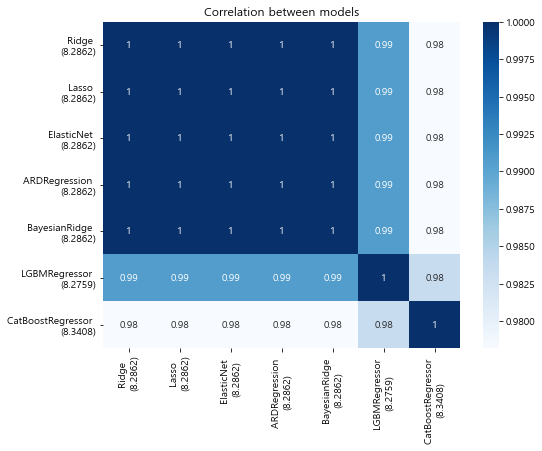

In [102]:
pred_results = []
for name, stk, stk_score in stks_trained:
    pred = list(stk.predict(S_dev))
    name = f'{name} \n({stk_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

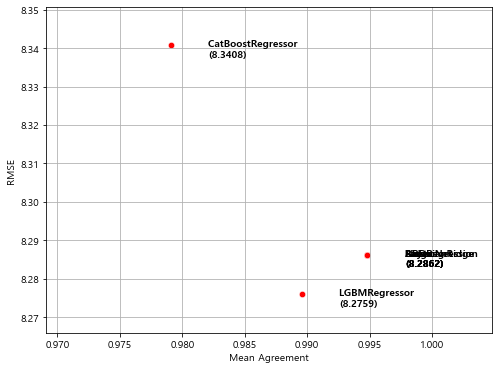

In [103]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [142]:
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk,score in stks_trained if name in selected]

weights_stk = []
rmse_best = 1000
for i in tqdm(range(0, 21, 1)):
    for j in range(0, 21, 1):
        if (i+j) != 20:
            continue
        pred = (models_for_ensemble[0][1].predict(S_dev) * i + models_for_ensemble[1][1].predict(S_dev) * j)/20
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_stk = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)            

print(rmse_best, weights_stk)


 38%|███████████████████████████████▌                                                   | 8/21 [00:00<00:00, 77.14it/s]

8.275931605039641 0 20
8.274329405192754 1 19
8.272949647698127 2 18
8.271792443867728 3 17
8.270857887116277 4 16
8.270146052923577 5 15
8.269656998804056 6 14
8.269390764283544 7 13
8.269347370883308 8 12



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 77.13it/s]

8.269347370883308 [8, 12]


In [125]:
w0,w1 = weights_stk
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk,score in stks_trained if name in selected]
stk_ensemble_val = (models_for_ensemble[0][1].predict(S_dev) * w0 + models_for_ensemble[1][1].predict(S_dev) * w1)/20

In [128]:
weights_ds = []
rmse_best = 1000
for i in tqdm(range(0, 21, 1)):
    for j in range(0, 21, 1):
        if (i+j) != 20:
            continue
        pred = (stk_ensemble_val*i+dnn.predict(x_dev_cat).flatten()*j)/20
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_ds = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)     


  5%|███▉                                                                               | 1/21 [00:00<00:04,  4.23it/s]


8.379930108575294 0 20
8.360666993321619 1 19


 14%|███████████▊                                                                       | 3/21 [00:00<00:03,  4.73it/s]


8.34281318238232 2 18
8.326377667428277 3 17


 24%|███████████████████▊                                                               | 5/21 [00:01<00:03,  4.77it/s]

8.31136894705596 4 16



 29%|███████████████████████▋                                                           | 6/21 [00:01<00:03,  4.73it/s]


8.297794698797336 5 15
8.285661985307529 6 14


 38%|███████████████████████████████▌                                                   | 8/21 [00:01<00:02,  4.80it/s]

8.274977165040713 7 13



 43%|███████████████████████████████████▌                                               | 9/21 [00:01<00:02,  4.76it/s]

8.265745826507125 8 12



 48%|███████████████████████████████████████                                           | 10/21 [00:02<00:02,  4.70it/s]

8.257972870166153 9 11



 52%|██████████████████████████████████████████▉                                       | 11/21 [00:02<00:02,  4.37it/s]


8.25166240300899 10 10
8.246817787031011 11 9


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:02<00:01,  4.55it/s]

8.24344160755674 12 8



 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:03<00:01,  4.39it/s]


8.241535666767383 13 7
8.241100985207426 14 6


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:04<00:00,  4.68it/s]


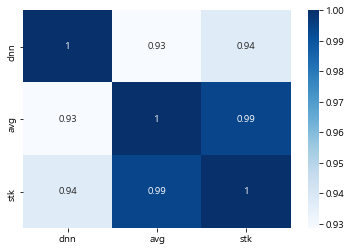

In [129]:
sns.heatmap(pd.DataFrame(dict(zip(['dnn','avg','stk'],[dnn.predict(x_dev_cat).flatten(),avg_test_result,stk_ensemble_val]))).corr(), annot=True, cmap='Blues')
plt.show()

### Deployment

In [131]:
w0,w1 = weights_stk
selected = [#'LinearRegression',
            #'Ridge',
            'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor'
            ]
models_for_ensemble = [(name,stk) for name,stk in stks_trained_for_submissions if name in selected]
stk_ensemble_results = (models_for_ensemble[0][1].predict(S_test) * w0 + models_for_ensemble[1][1].predict(S_test) * w1)/20

In [134]:
w0, w1 = weights_ds
pd.DataFrame({'age': (stk_ensemble_val*w0+dnn.predict(x_dev_cat).flatten()*w1)/20}).to_csv('categorical_stken14laslgbm_rid_lgbm_cat_dnn6_dev.csv', index=False)

In [136]:
w0, w1 = weights_ds
pd.DataFrame({'custid': test_id, 'age': (stk_ensemble_results*w0+dnn.predict(x_test_cat).flatten()*w1)/20}).to_csv('categorical_stken14laslgbm_rid_lgbm_cat_dnn6.csv', index=False)